In [25]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import requests

In [5]:
symbol = 'FPT'
yearly = True
# balancesheet = requests.get(f'http://localhost/api/v1/scfa/balancesheet?symbols={symbol}&yearly={yearly}')
balancesheet = requests.get(f'https://app.finsc.vn/api/v1/scfa/balancesheet?symbols={symbol}&yearly={yearly}')
balancesheet = balancesheet.json()
df_balancesheet = pd.DataFrame(balancesheet['data'])
df_balancesheet.head()

ticker  quarter  year  shortAsset  cash  shortInvest  shortReceivable  \
0    FPT        5  2024       45536  9315        21785            11382   
1    FPT        5  2023       36706  8279        16104             9674   
2    FPT        5  2022       30938  6440        13047             8503   
3    FPT        5  2021       35118  5418        20731             6882   
4    FPT        5  2020       25266  4686        12436             6265   

   inventory  longAsset  fixedAsset  ...  oweCentralBank  valuablePaper  \
0       1857      26464       14816  ...            None           None   
1       1593      23577       13643  ...            None           None   
2       1966      20713       12033  ...            None           None   
3       1507      18580       10399  ...            None           None   
4       1290      16468        8318  ...            None           None   

   payableInterest  receivableInterest  deposit  otherDebt  fund  \
0             None                None     None        874  None   
1             None                None     None       1015  None   
2             None                None     None        569  None   
3             None                None     None        555  None   
4             None                None     None        745  None   

  unDistributedIncome minorShareHolderProfit payable  
0                 0.0                   5933   36272  
1                 0.0                   4959   30350  
2                 0.0                   4310   26294  
3                 0.0                   3477   32280  
4                 0.0                   2860   23129  

[5 rows x 37 columns]

In [6]:
cashflow = requests.get(f'https://app.finsc.vn/api/v1/scfa/cashflow?symbols={symbol}&yearly={yearly}')
cashflow = cashflow.json()
df_cashflow = pd.DataFrame(cashflow['data'])
df_cashflow.head()

ticker  quarter  year  investCost  fromInvest  fromFinancial  fromSale  \
0    FPT        5  2024       -3275       -8462          -2198     11704   
1    FPT        5  2023       -3978       -6548          -1168      9517   
2    FPT        5  2022       -3215        5757          -9773      5054   
3    FPT        5  2021       -2911      -10413           5365      5840   
4    FPT        5  2020       -3018       -8144           3037      6340   

   freeCashFlow  
0        7223.0  
1        4443.0  
2        6059.0  
3        2787.0  
4         901.0

In [7]:
incomestatement = requests.get(f'https://app.finsc.vn/api/v1/scfa/incomestatement?symbols={symbol}&yearly={yearly}')
incomestatement = incomestatement.json()
df_incomestatement = pd.DataFrame(incomestatement['data'])
df_incomestatement.head()

ticker  quarter  year  revenue  yearRevenueGrowth quarterRevenueGrowth  \
0    FPT        5  2024    62849              0.194                 None   
1    FPT        5  2023    52618              0.196                 None   
2    FPT        5  2022    44010              0.234                 None   
3    FPT        5  2021    35657              0.195                 None   
4    FPT        5  2020    29830              0.076                 None   

   costOfGoodSold  grossProfit  operationExpense  operationProfit  ...  \
0          -39150        23698            -13190            10508  ...   
1          -32298        20320            -11868             8452  ...   
2          -26842        17167            -10373             6795  ...   
3          -22025        13632             -8217             5415  ...   
4          -18017        11814             -7209             4605  ...   

   postTaxProfit shareHolderIncome  yearShareHolderIncomeGrowth  \
0           9427              7857                        0.215   
1           7788              6465                        0.218   
2           6491              5310                        0.224   
3           5349              4337                        0.226   
4           4424              3538                        0.128   

   quarterShareHolderIncomeGrowth  investProfit  serviceProfit  otherProfit  \
0                            None          None           None         None   
1                            None          None           None         None   
2                            None          None           None         None   
3                            None          None           None         None   
4                            None          None           None         None   

  provisionExpense operationIncome ebitda  
0             None            None  13044  
1             None            None  10738  
2             None            None   8628  
3             None            None   7059  
4             None            None   6095  

[5 rows x 24 columns]

In [8]:
financialratio = requests.get(f'https://app.finsc.vn/api/v1/scfa/financialratio?symbols={symbol}&yearly={yearly}')
financialratio = financialratio.json()
df_financialratio = pd.DataFrame(financialratio['data'])
df_financialratio.head()

ticker  quarter  year  priceToEarning  priceToBook  valueBeforeEbitda  \
0    FPT        5  2024            28.5          7.5               13.4   
1    FPT        5  2023            18.7          4.8               14.6   
2    FPT        5  2022            15.5          3.9               12.3   
3    FPT        5  2021            18.7          4.5               16.5   
4    FPT        5  2020            12.4          2.8               12.4   

   dividend    roe    roa  daysReceivable  ...  loanOnAsset  loanOnDeposit  \
0     0.015  0.287  0.119              52  ...         None           None   
1     0.028  0.281  0.116              47  ...         None           None   
2     0.041  0.272  0.101              49  ...         None           None   
3     0.042  0.258  0.091              42  ...         None           None   
4     0.077  0.238  0.094              35  ...         None           None   

   depositOnEarnAsset  badDebtOnAsset  liquidityOnLiability payableOnEquity  \
0                None            None                  None             1.0   
1                None            None                  None             1.0   
2                None            None                  None             1.0   
3                None            None                  None             1.5   
4                None            None                  None             1.2   

  cancelDebt ebitdaOnStockChange bookValuePerShareChange creditGrowth  
0       None               0.049                   0.193         None  
1       None               0.054                   0.187         None  
2       None               0.031                   0.173         None  
3       None               0.001                   0.139         None  
4       None              -0.021                  -0.399         None  

[5 rows x 59 columns]

In [9]:
# Basic analytics for df_balancesheet
print("Shape:", df_balancesheet.shape)
print("\nColumns:", df_balancesheet.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_balancesheet.describe())
print("\nMissing values per column:")
print(df_balancesheet.isnull().sum())

Shape: (23, 37)

Columns: ['ticker', 'quarter', 'year', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable']

Describe (numeric columns):
       quarter        year    shortAsset         cash   shortInvest  \
count     23.0    23.00000     23.000000    23.000000     23.000000   
mean       5.0  2013.00000  15331.826087  3236.086957   4888.173913   
std        0.0     6.78233  12638.024909  2579.581906   6938.426804   
min        5.0  2002.00000    510.000000    80.000000      0.000000   
25%        5.0  2007.50000   4500.500000  1069.5000

In [10]:
# Basic analytics for df_cashflow
print("Cashflow Shape:", df_cashflow.shape)
print("\nColumns:", df_cashflow.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_cashflow.describe())
print("\nMissing values per column:")
print(df_cashflow.isnull().sum())

Cashflow Shape: (23, 8)

Columns: ['ticker', 'quarter', 'year', 'investCost', 'fromInvest', 'fromFinancial', 'fromSale', 'freeCashFlow']

Describe (numeric columns):
       quarter        year  investCost    fromInvest  fromFinancial  \
count     23.0    23.00000    23.00000     23.000000      23.000000   
mean       5.0  2013.00000 -1462.73913  -2236.608696     -99.478261   
std        0.0     6.78233  1266.40914   3482.486099    2722.961070   
min        5.0  2002.00000 -3978.00000 -10413.000000   -9773.000000   
25%        5.0  2007.50000 -2682.50000  -3299.000000    -500.500000   
50%        5.0  2013.00000  -920.00000  -1479.000000     276.000000   
75%        5.0  2018.50000  -476.00000   -196.000000     580.500000   
max        5.0  2024.00000   -22.00000   5757.000000    5365.000000   

           fromSale  freeCashFlow  
count     23.000000     16.000000  
mean    2742.130435   2580.062500  
std     3176.614125   1973.282391  
min     -291.000000    385.000000  
25%      504.5

In [11]:
# Basic analytics for df_incomestatement
print("Incomestatement Shape:", df_incomestatement.shape)
print("\nColumns:", df_incomestatement.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_incomestatement.describe())
print("\nMissing values per column:")
print(df_incomestatement.isnull().sum())

Incomestatement Shape: (23, 24)

Columns: ['ticker', 'quarter', 'year', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']

Describe (numeric columns):
       quarter        year       revenue  yearRevenueGrowth  costOfGoodSold  \
count     23.0    23.00000     23.000000          22.000000       23.000000   
mean       5.0  2013.00000  27125.347826           0.249591   -19782.043478   
std        0.0     6.78233  15093.048149           0.452691     9552.846004   
min        5.0  2002.00000   1515.000000          -0.456000   -39150.000000   
25%        5.0  2007.50000  17393.000000           0.081250   -26649.000000   
5

In [12]:
# Basic analytics for df_financialratio
print("Financial Ratio Shape:", df_financialratio.shape)
print("\nColumns:", df_financialratio.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_financialratio.describe())
print("\nMissing values per column:")
print(df_financialratio.isnull().sum())

Financial Ratio Shape: (21, 59)

Columns: ['ticker', 'quarter', 'year', 'priceToEarning', 'priceToBook', 'valueBeforeEbitda', 'dividend', 'roe', 'roa', 'daysReceivable', 'daysInventory', 'daysPayable', 'ebitOnInterest', 'earningPerShare', 'bookValuePerShare', 'interestMargin', 'nonInterestOnToi', 'badDebtPercentage', 'provisionOnBadDebt', 'costOfFinancing', 'equityOnTotalAsset', 'equityOnLoan', 'costToIncome', 'equityOnLiability', 'currentPayment', 'quickPayment', 'epsChange', 'ebitdaOnStock', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset', 'debtOnEbitda', 'shortOnLongDebt', 'assetOnEquity', 'capitalBalance', 'cashOnEquity', 'cashOnCapitalize', 'cashCirculation', 'revenueOnWorkCapital', 'capexOnFixedAsset', 'revenueOnAsset', 'postTaxOnPreTax', 'ebitOnRevenue', 'preTaxOnEbit', 'preProvisionOnToi', 'postTaxOnToi', 'loanOnEarnAsset', 'loanOnAsset', 'loanOnDeposit', 'depositOnEarnAsset', 'badDebtOnAsset', 'liquidityOnLiability', 'payableOnEquit

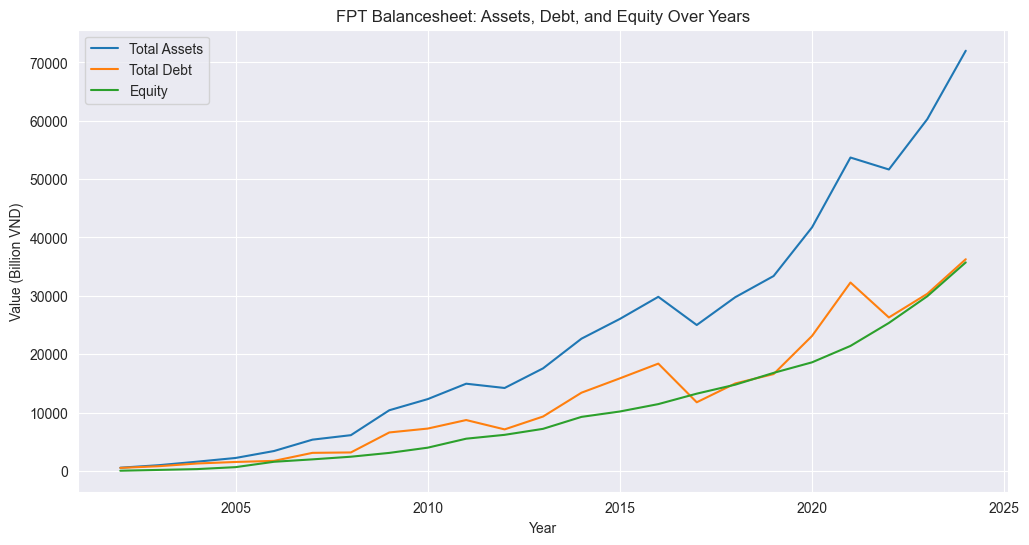

In [13]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Total Assets')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['debt'], label='Total Debt')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['equity'], label='Equity')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Assets, Debt, and Equity Over Years')
ax.legend()
plt.grid(True)
plt.show()

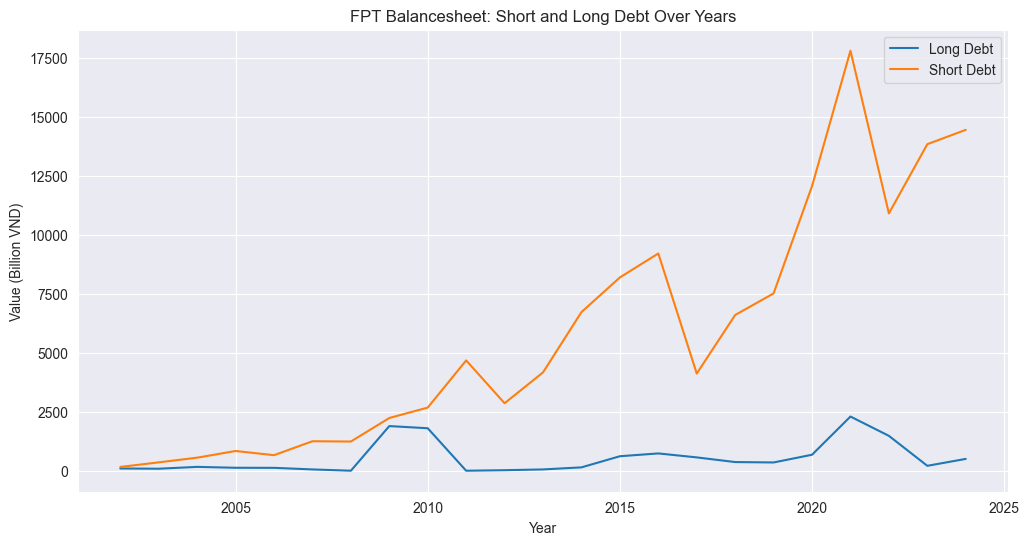

In [14]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['longDebt'], label='Long Debt')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['shortDebt'], label='Short Debt')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Short and Long Debt Over Years')
ax.legend()
plt.grid(True)
plt.show()

Gộp nợ và khả năng trả nợ

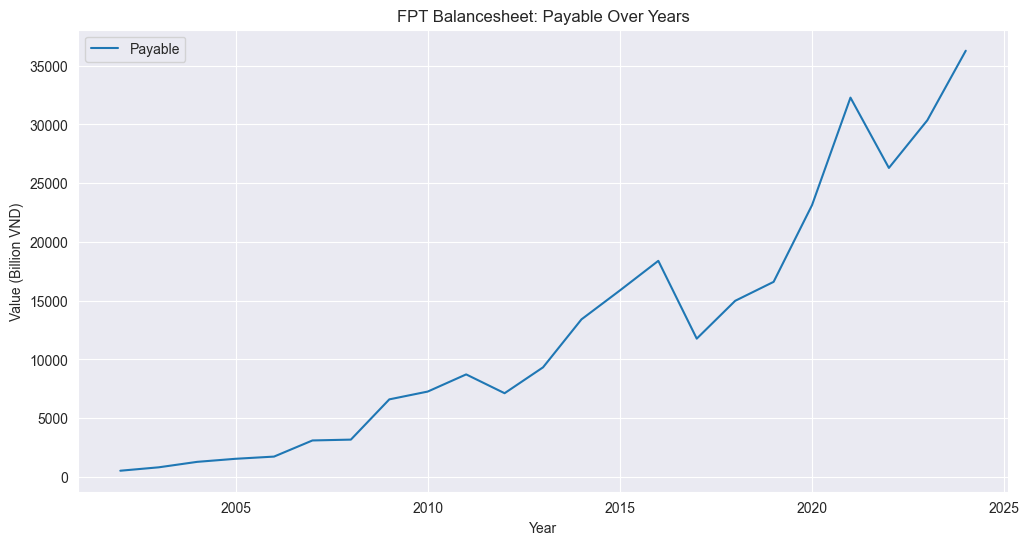

In [15]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['payable'], label='Payable')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Payable Over Years')
ax.legend()
plt.grid(True)
plt.show()

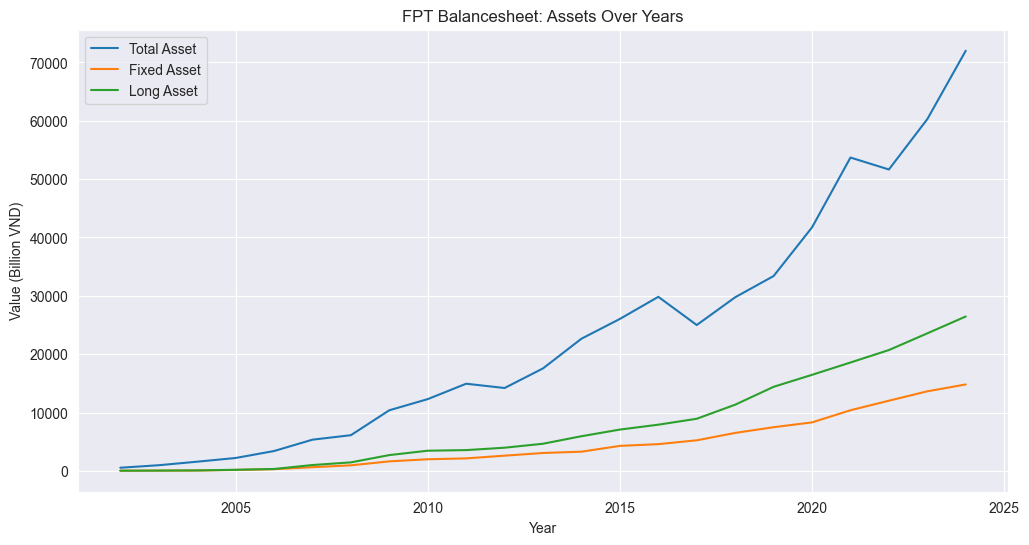

In [16]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Total Asset')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['fixedAsset'], label='Fixed Asset')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['longAsset'], label='Long Asset')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Assets Over Years')
ax.legend()
plt.grid(True)
plt.show()


Columns: ['ticker', 'quarter', 'year', 'investCost', 'fromInvest', 'fromFinancial', 'fromSale', 'freeCashFlow']


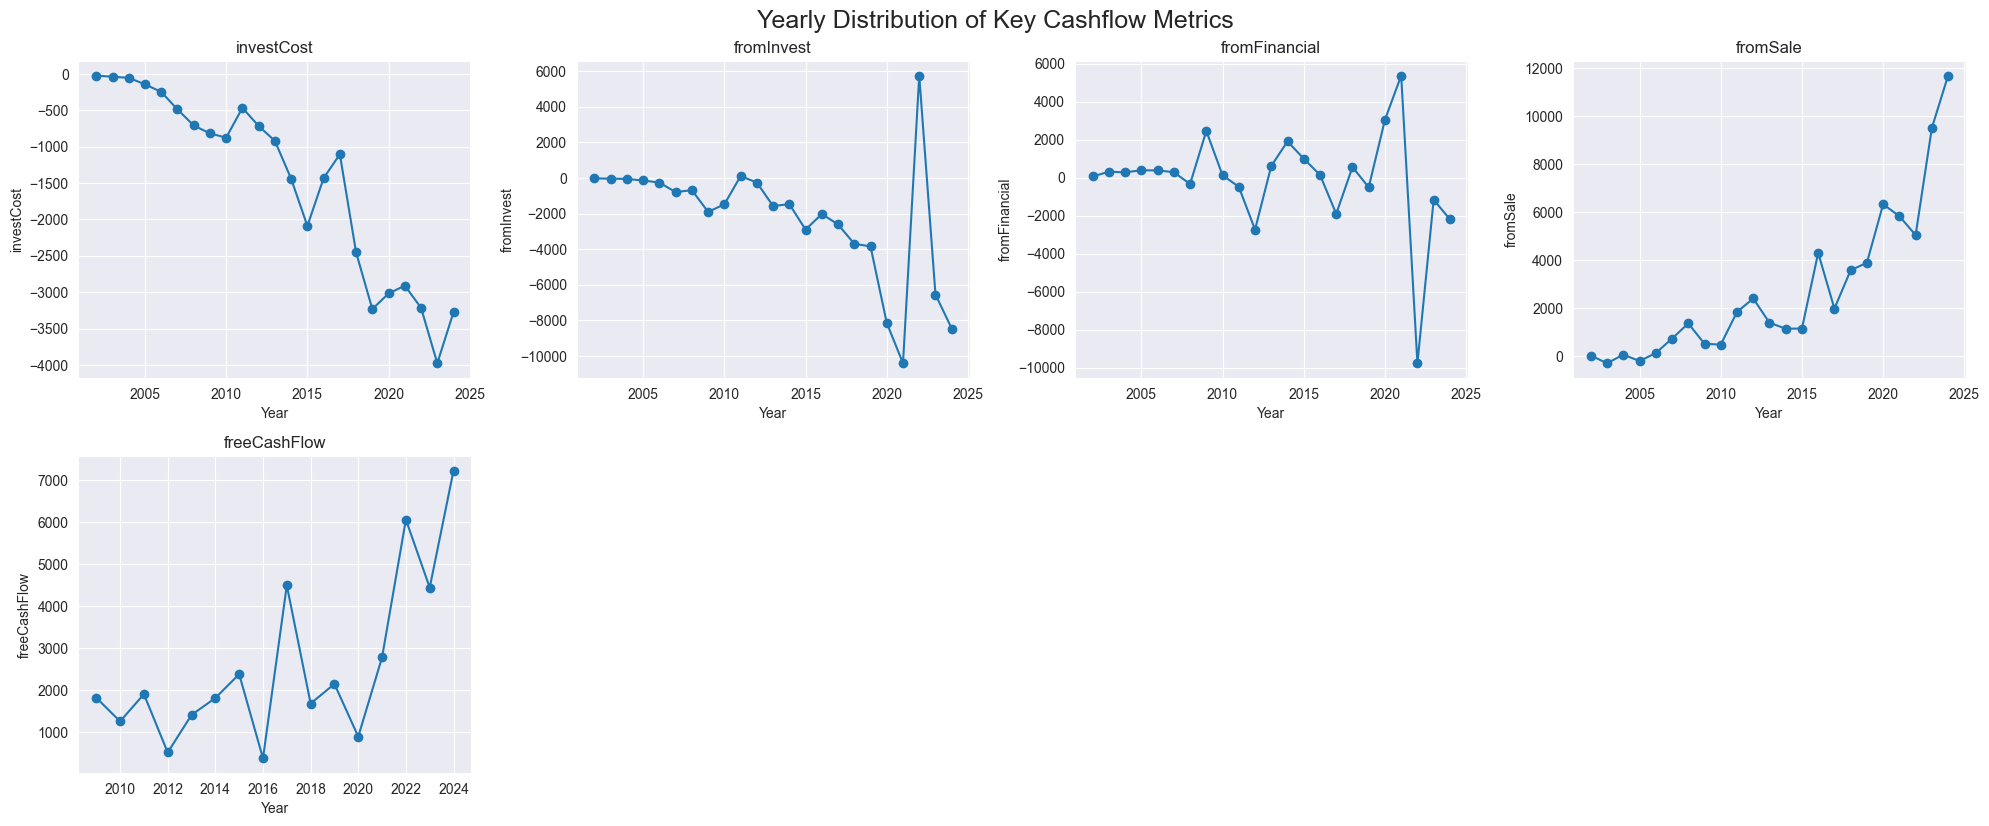

In [17]:
print("\nColumns:", df_cashflow.columns.tolist())
cashflow_numerics_columns = [
    "investCost",
    "fromInvest",
    "fromFinancial",
    "fromSale",
    "freeCashFlow"
]

# Plot distribution by year for each numeric column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()

df_cashflow = df_cashflow.sort_values('year')

for i, col in enumerate(cashflow_numerics_columns):
    ax = axes[i]
    ax.plot(df_cashflow['year'], df_cashflow[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(len(cashflow_numerics_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Cashflow Metrics', fontsize=18)
plt.show()


Columns: ['ticker', 'quarter', 'year', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']


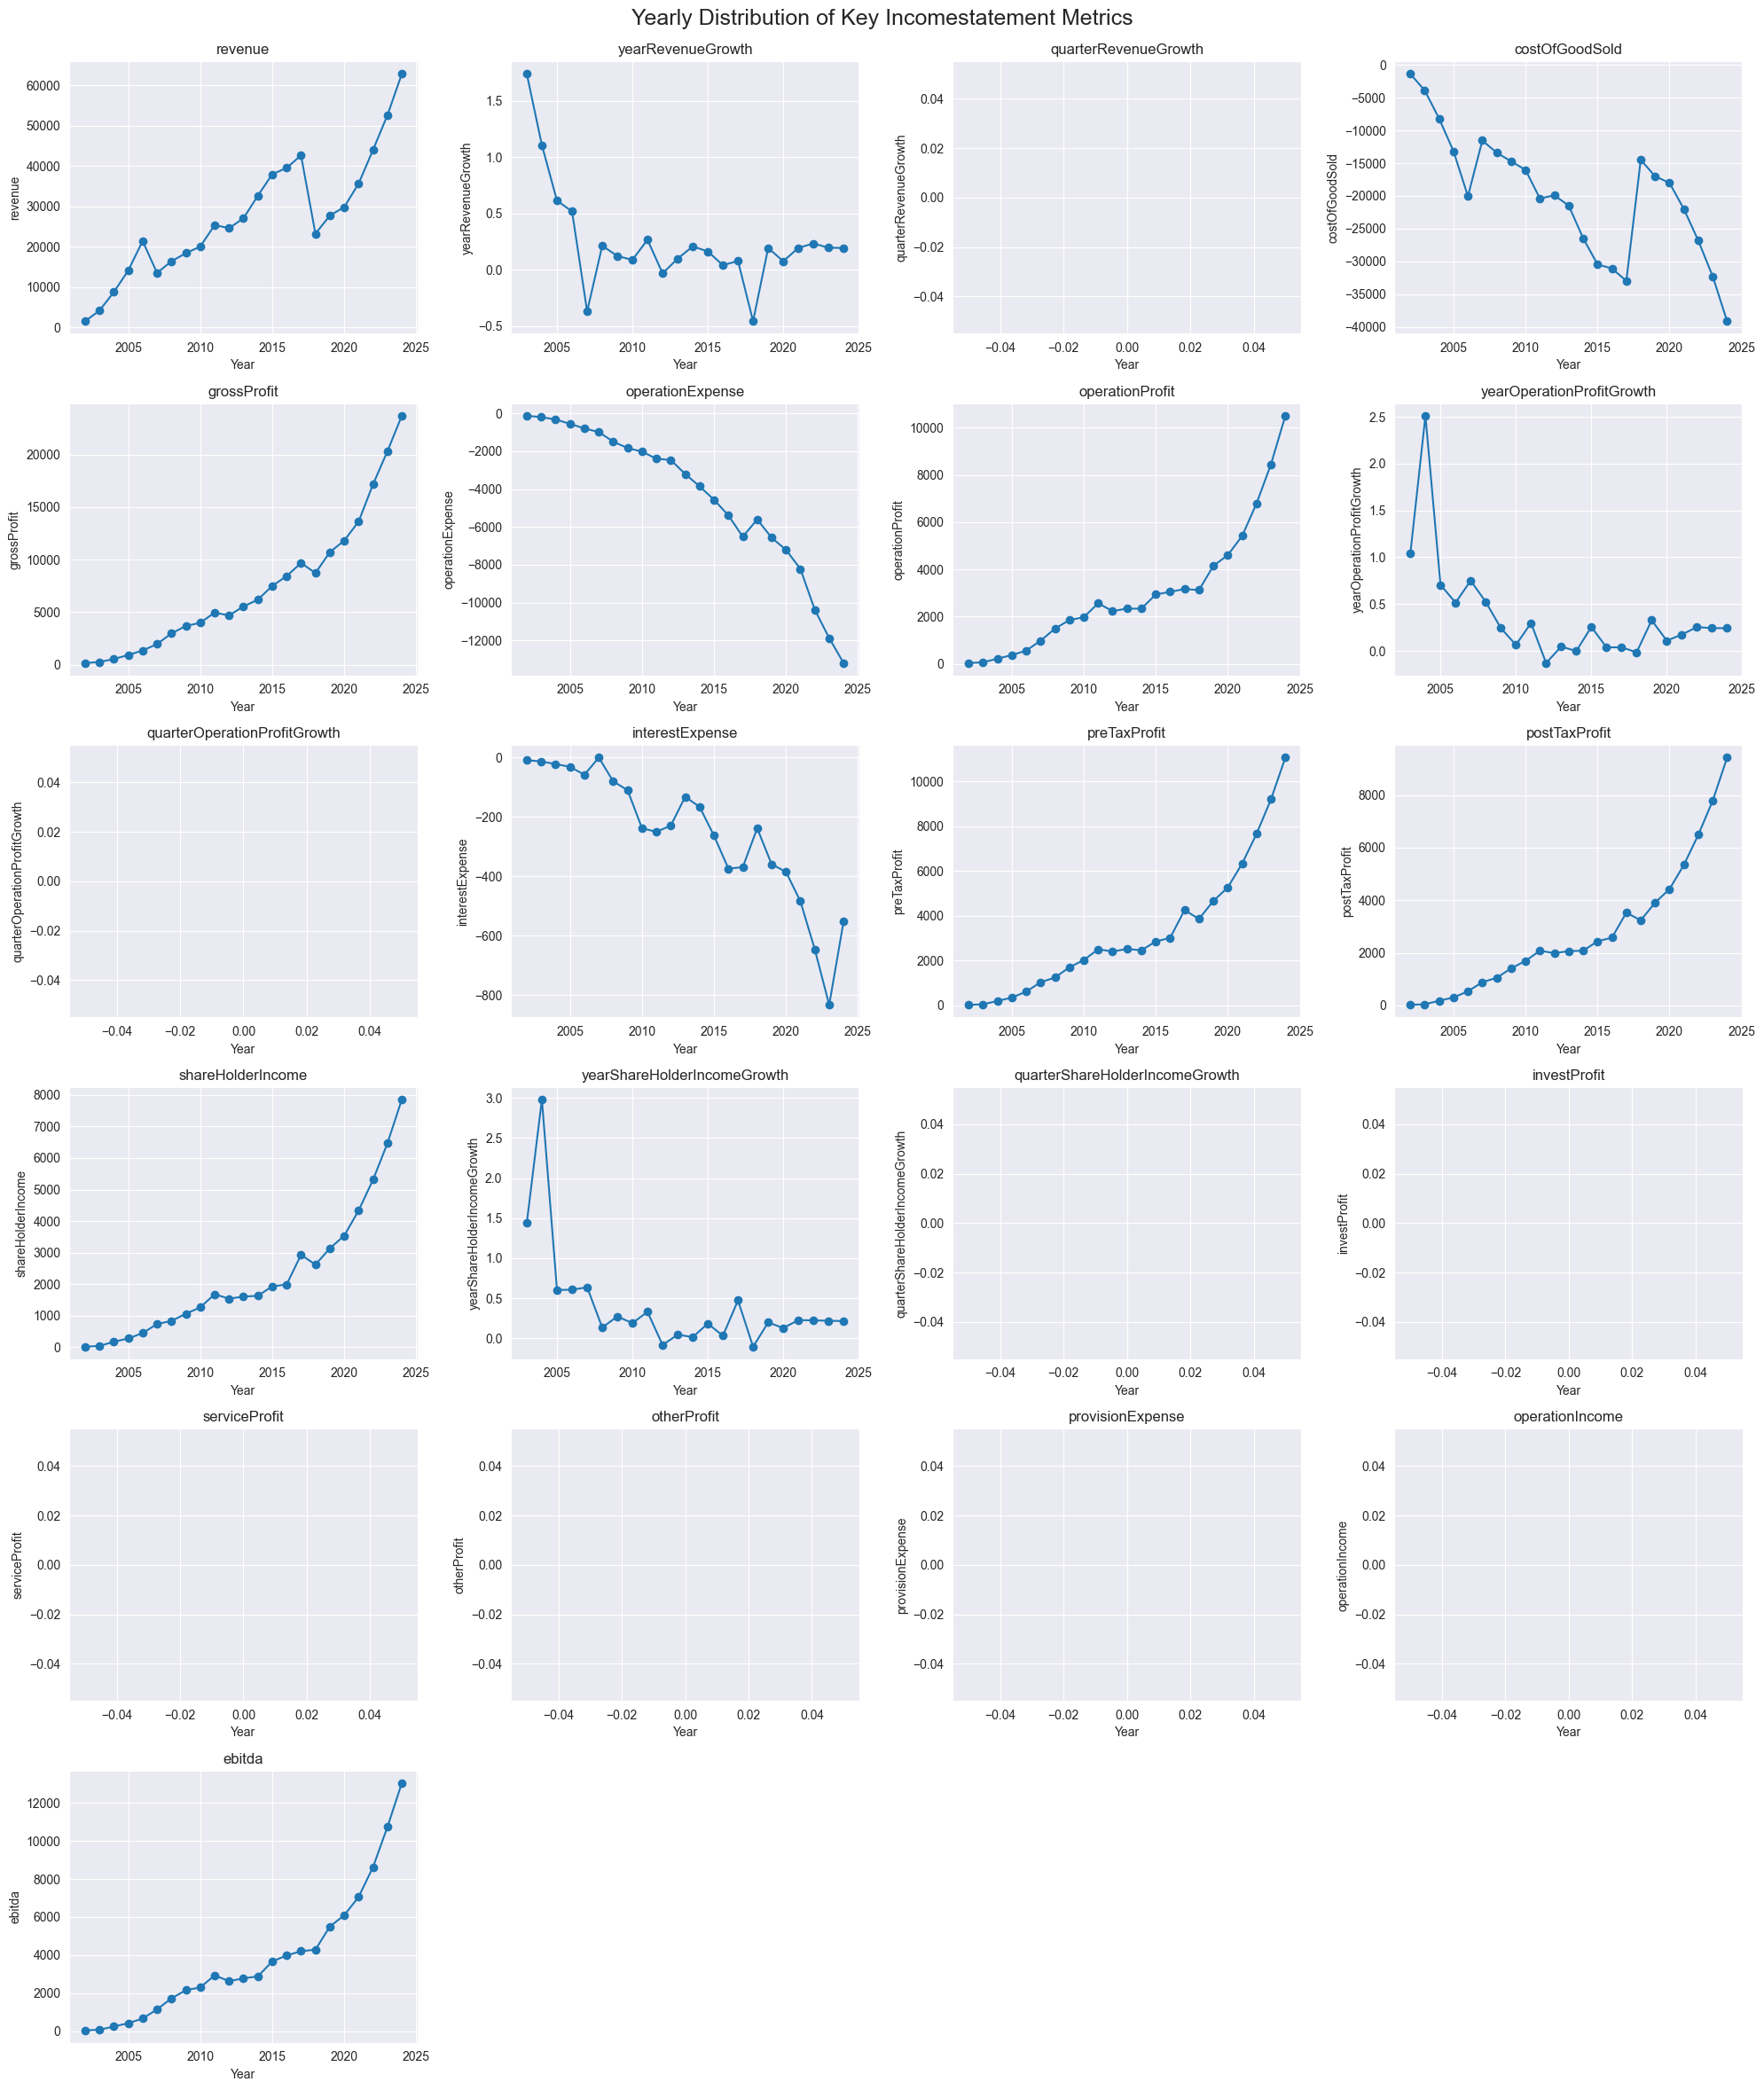

In [18]:
print("\nColumns:", df_incomestatement.columns.tolist())
incomestatement_numerics_columns = [
    "revenue",
    "yearRevenueGrowth",
    "quarterRevenueGrowth",
    "costOfGoodSold",
    "grossProfit",
    "operationExpense",
    "operationProfit",
    "yearOperationProfitGrowth",
    "quarterOperationProfitGrowth",
    "interestExpense",
    "preTaxProfit",
    'postTaxProfit',
    'shareHolderIncome', 
    'yearShareHolderIncomeGrowth', 
    'quarterShareHolderIncomeGrowth', 
    'investProfit', 
    'serviceProfit', 
    'otherProfit', 
    'provisionExpense', 
    'operationIncome', 
    'ebitda'
]

# Dynamically determine grid size
num_plots = len(incomestatement_numerics_columns)
ncols = 4
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

df_incomestatement_sorted = df_incomestatement.sort_values('year')

for i, col in enumerate(incomestatement_numerics_columns):
    ax = axes[i]
    ax.plot(df_incomestatement_sorted['year'], df_incomestatement_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Incomestatement Metrics', fontsize=18)
plt.show()

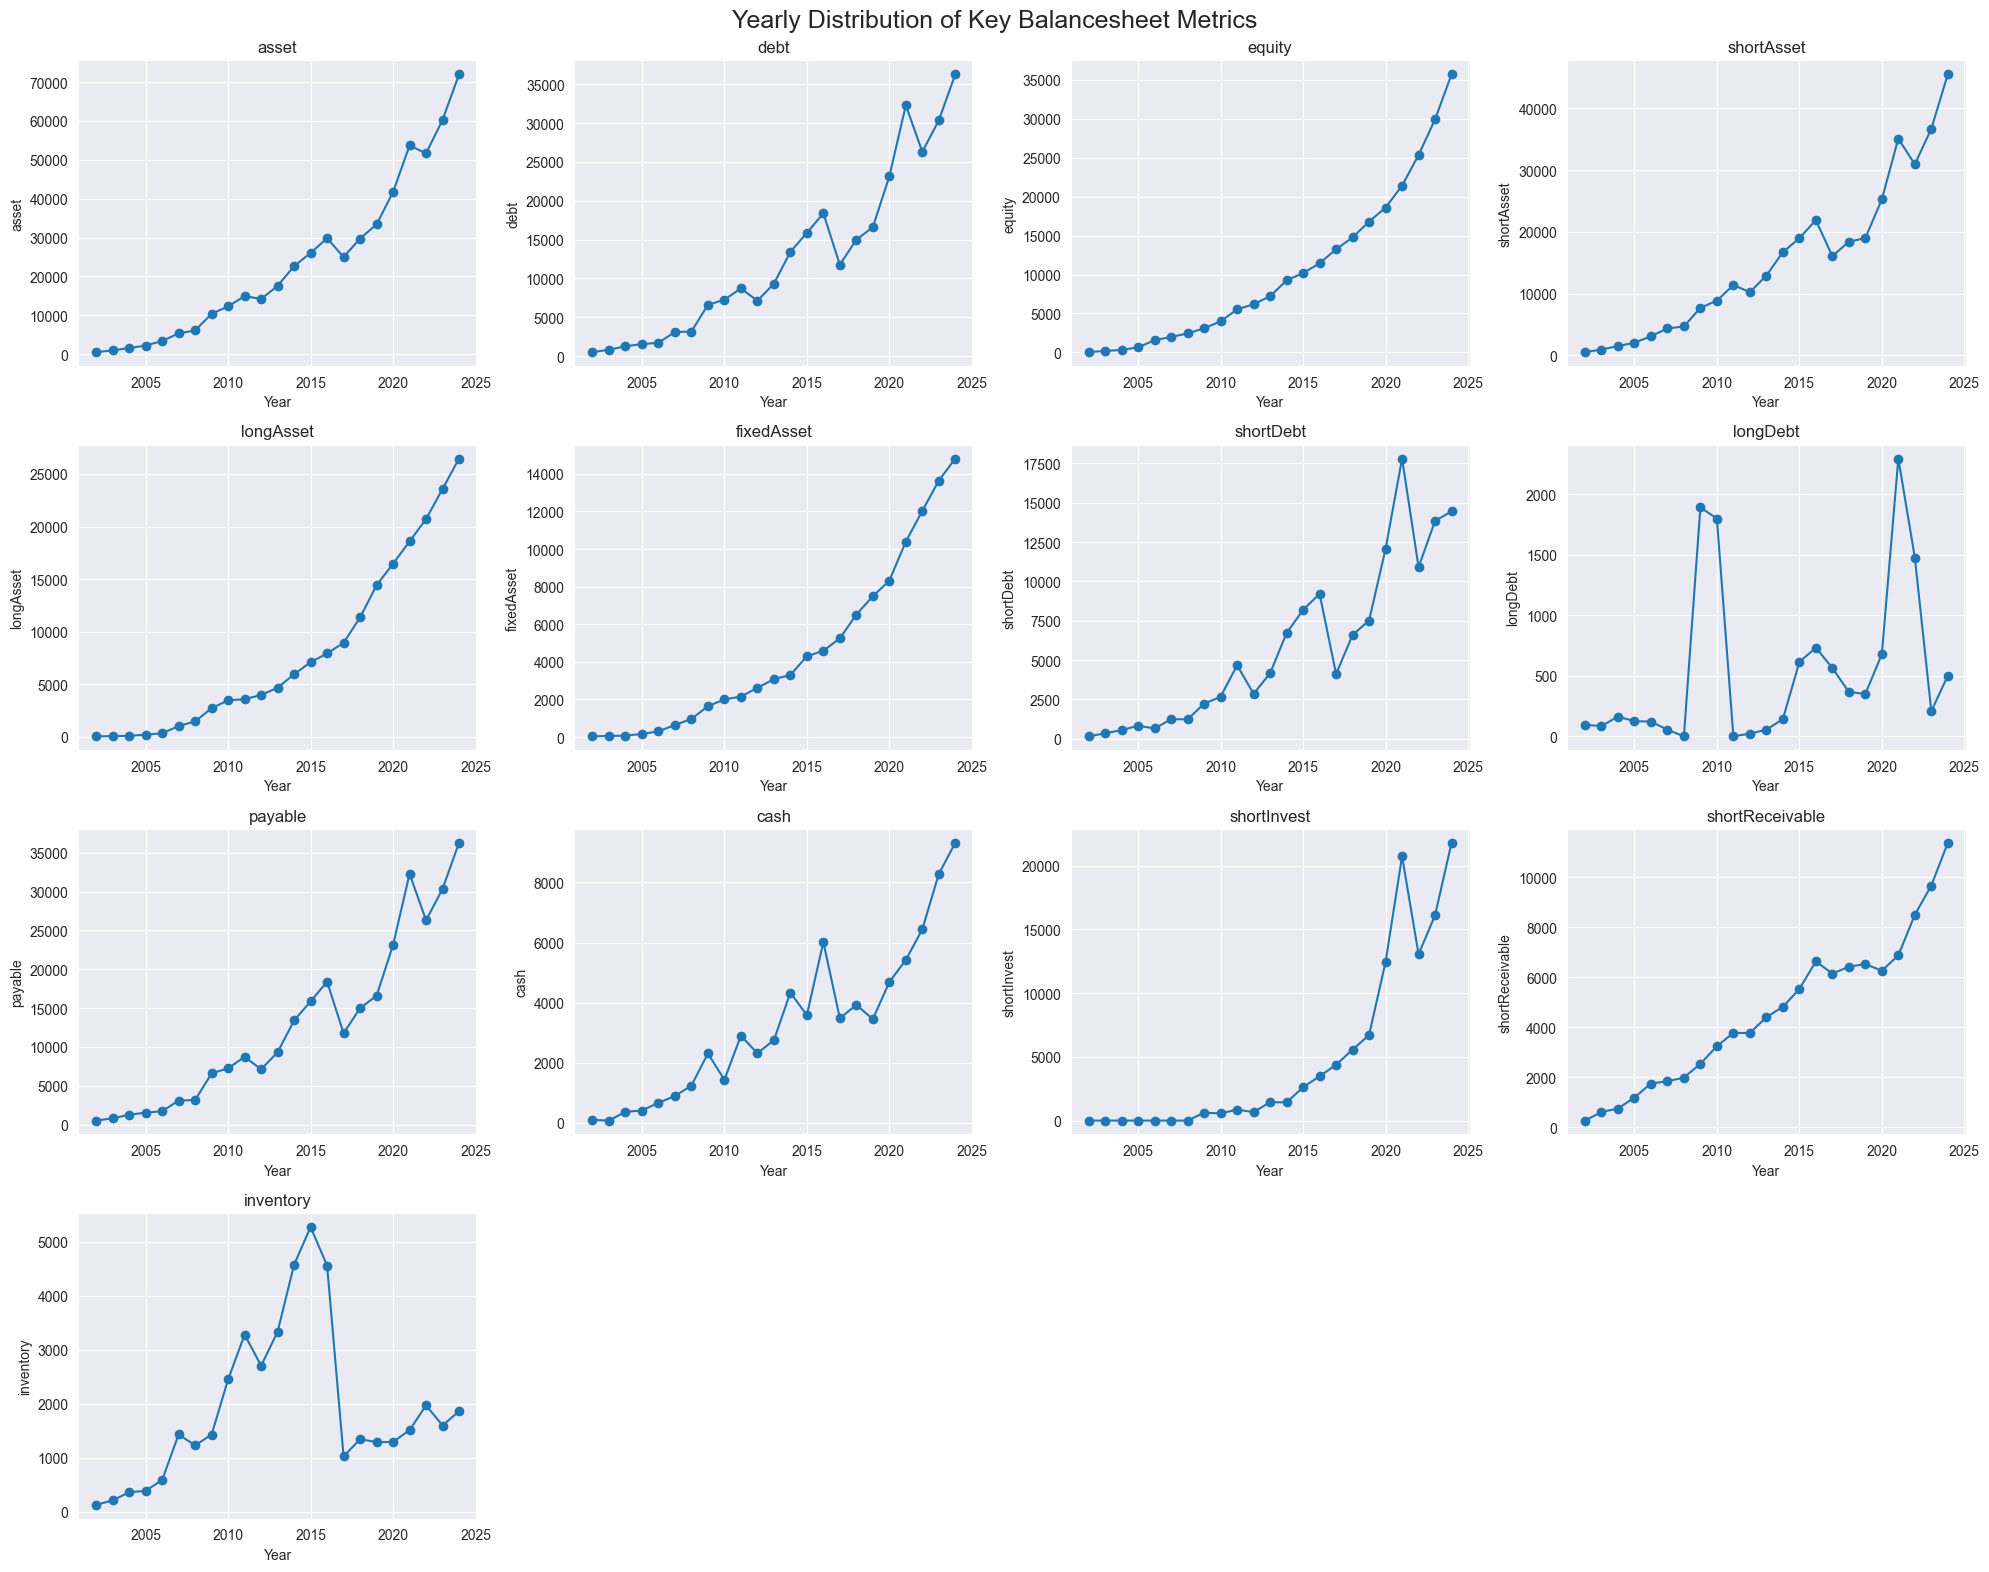

In [19]:
# Plot histograms for key numeric columns in df_balancesheet
numeric_cols = ['asset', 'debt', 'equity', 'shortAsset', 'longAsset', 'fixedAsset', 'shortDebt', 'longDebt', 'payable', 'cash', 'shortInvest', 'shortReceivable', 'inventory']

# Plot distribution by year for each numeric column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()

df_balancesheet_sorted = df_balancesheet.sort_values('year')

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Balancesheet Metrics', fontsize=18)
plt.show()

Lợi nhuận của cty và cổ phiếu công ty xem xét tương thích

lợi nhuận tăng, cổ phiếu giảm
lợi nhuận giảm, cổ phiếu tăng
increase, increase
decrease, decrease

check relationship between columns.

['priceToEarning', 'priceToBook', 'valueBeforeEbitda', 'dividend', 'roe', 'roa', 'daysReceivable', 'daysInventory', 'daysPayable', 'ebitOnInterest', 'earningPerShare', 'bookValuePerShare', 'interestMargin', 'nonInterestOnToi', 'badDebtPercentage', 'provisionOnBadDebt', 'costOfFinancing', 'equityOnTotalAsset', 'equityOnLoan', 'costToIncome', 'equityOnLiability', 'currentPayment', 'quickPayment', 'epsChange', 'ebitdaOnStock', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset', 'debtOnEbitda', 'shortOnLongDebt', 'assetOnEquity', 'capitalBalance', 'cashOnEquity', 'cashOnCapitalize', 'cashCirculation', 'revenueOnWorkCapital', 'capexOnFixedAsset', 'revenueOnAsset', 'postTaxOnPreTax', 'ebitOnRevenue', 'preTaxOnEbit', 'preProvisionOnToi', 'postTaxOnToi', 'loanOnEarnAsset', 'loanOnAsset', 'loanOnDeposit', 'depositOnEarnAsset', 'badDebtOnAsset', 'liquidityOnLiability', 'payableOnEquity', 'cancelDebt', 'ebitdaOnStockChange', 'bookValuePerShareChange', 'cr

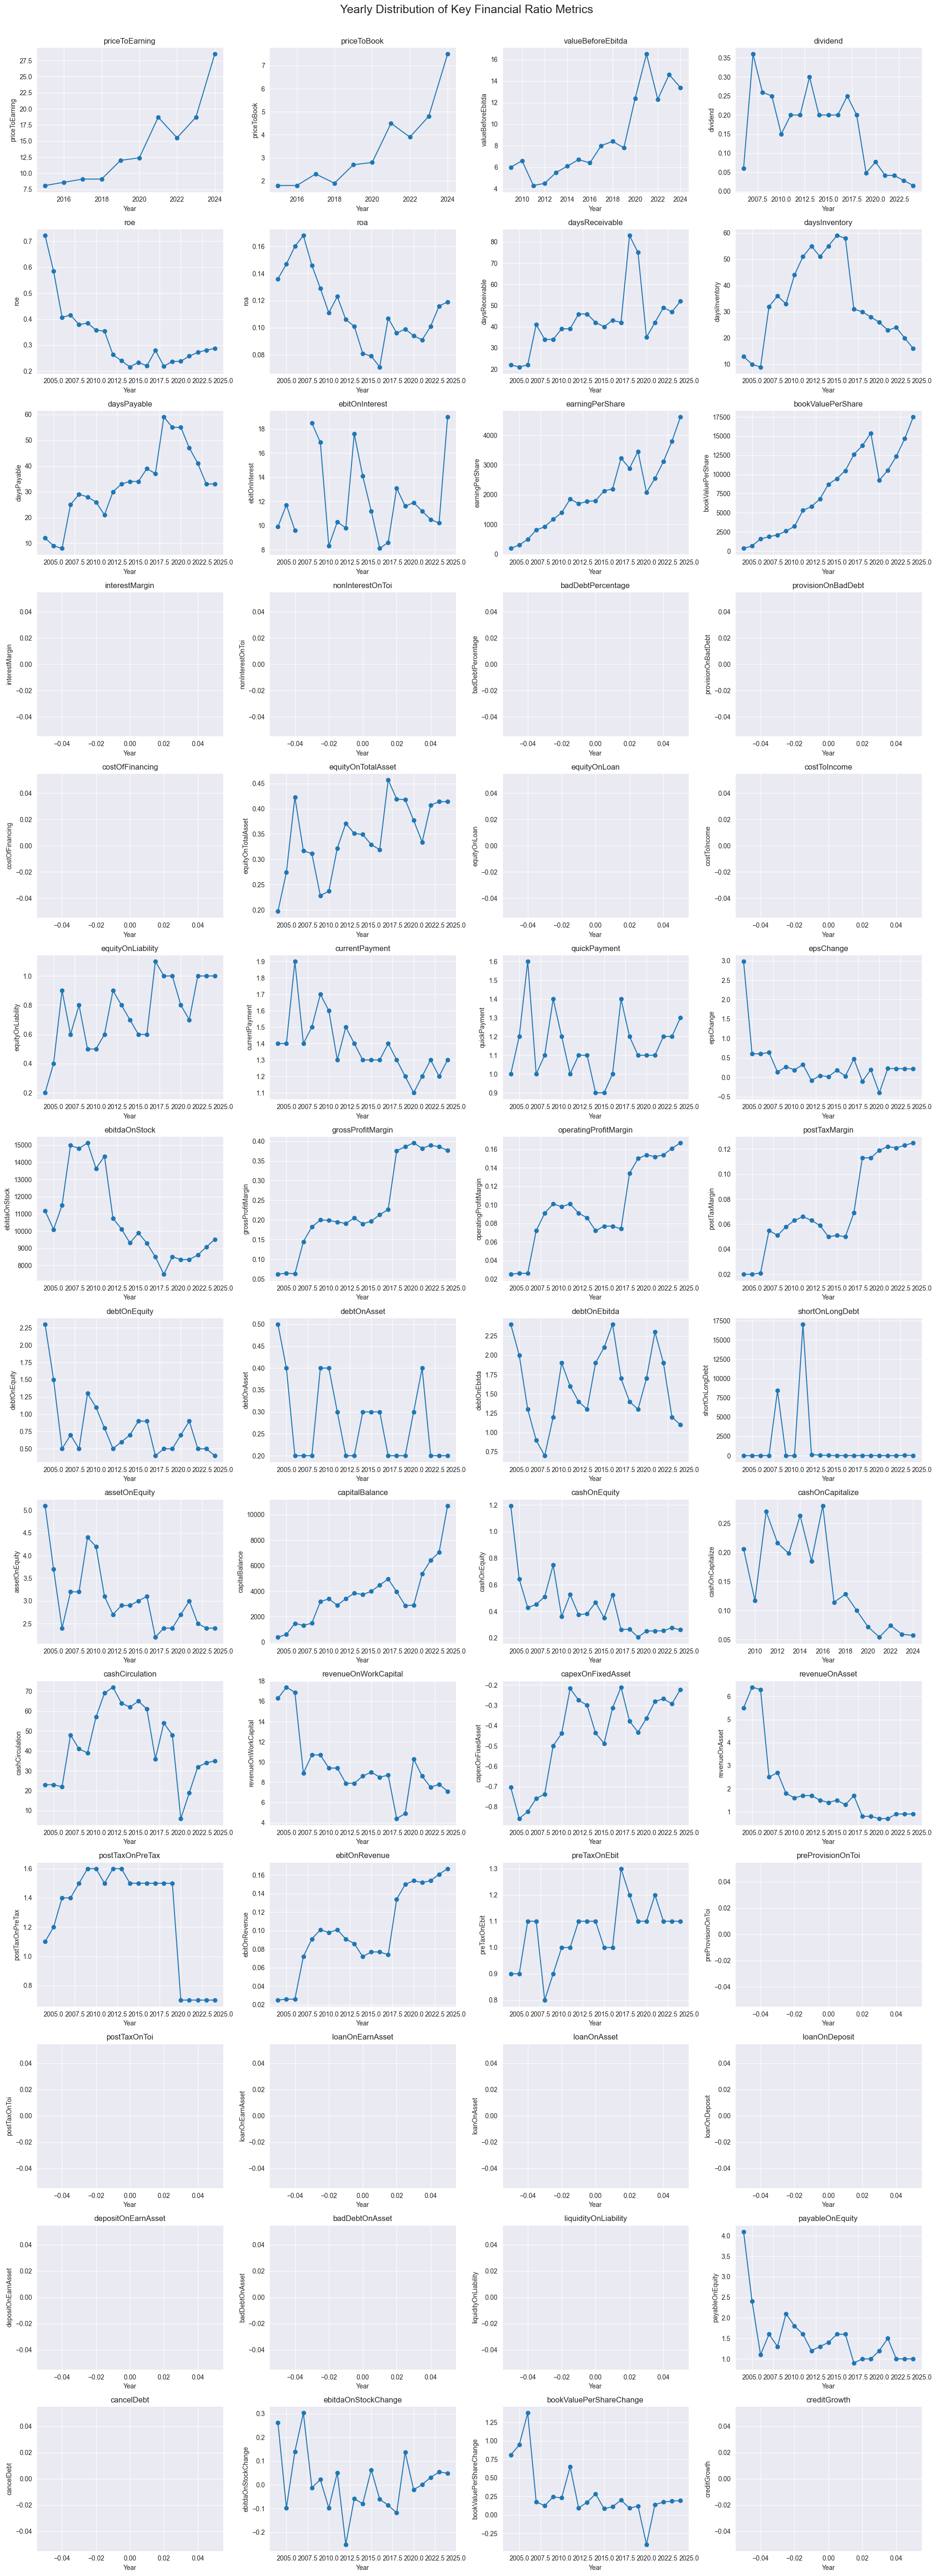

In [20]:
df_financialratio.head()
financialratio_numerics_cols = df_financialratio.columns.tolist()[3:]  # Exclude 'symbol', 'year', 'quarter'
print(financialratio_numerics_cols)

# Dynamically determine grid size
num_plots = len(financialratio_numerics_cols)
ncols = 4
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

df_financialratio_sorted = df_financialratio.sort_values('year')

for i, col in enumerate(financialratio_numerics_cols):
    ax = axes[i]
    ax.plot(df_financialratio_sorted['year'], df_financialratio_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Financial Ratio Metrics', fontsize=18)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  asset   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -213.903
Date:                Mon, 13 Oct 2025   AIC                            433.806
Time:                        16:19:30   BIC                            437.079
Sample:                             0   HQIC                           434.577
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.090     11.158      0.000       0.824       1.176
ma.L1         -0.7559      0.216     -3.504      0.000      -1.179      -0.333
sigma2       1.57e+07   3.79e-09   4.14e+15      0.0

/Users/tuyenhuynh/Documents/Study/FinalProject/FinancialAssistant/notebook/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/tuyenhuynh/Documents/Study/FinalProject/FinancialAssistant/notebook/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/tuyenhuynh/Documents/Study/FinalProject/FinancialAssistant/notebook/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the support

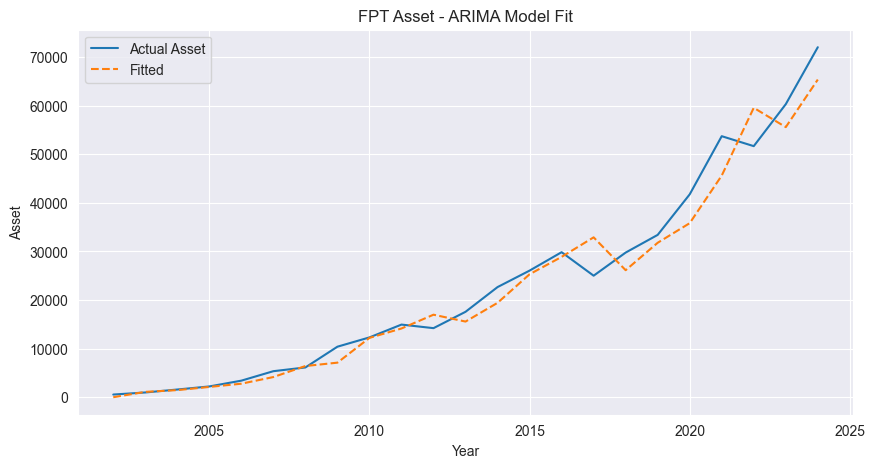

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the time series data for 'asset'
df_balancesheet_sorted = df_balancesheet.sort_values('year')
asset_series = df_balancesheet_sorted.set_index('year')['asset']

# Fit ARIMA model (order can be tuned as needed, here using (1,1,1) as example)
model = ARIMA(asset_series, order=(1, 1, 1))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Plot actual vs fitted values
plt.figure(figsize=(10, 5))
plt.plot(asset_series, label='Actual Asset')
plt.plot(asset_series.index, model_fit.fittedvalues, label='Fitted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Asset')
plt.title(f'{symbol} Asset - ARIMA Model Fit')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Explore insights from the above visualizations

# 1. Balancesheet trends
print("Asset, Debt, and Equity trends (first and last year):")
print(df_balancesheet_sorted[['year', 'asset', 'debt', 'equity']].iloc[[0, -1]])

# 2. Cashflow trends
print("\nFree Cash Flow trend (first and last year):")
print(df_cashflow[['year', 'freeCashFlow']].sort_values('year').iloc[[0, -1]])

# 3. Incomestatement trends
print("\nRevenue and Net Profit trend (first and last year):")
print(df_incomestatement[['year', 'revenue', 'postTaxProfit']].sort_values('year').iloc[[0, -1]])

# 4. Financial ratios (example: ROE, ROA if available)
for col in ['roe', 'roa']:
    if col in df_financialratio.columns:
        print(f"\n{col.upper()} trend (first and last year):")
        print(df_financialratio[['year', col]].sort_values('year').iloc[[0, -1]])

# 5. Correlation between key metrics
print("\nCorrelation between Asset, Debt, and Equity:")
print(df_balancesheet[['asset', 'debt', 'equity']].corr())

print("\nCorrelation between Revenue and Post Tax Profit:")
print(df_incomestatement[['revenue', 'postTaxProfit']].corr())

Asset, Debt, and Equity trends (first and last year):
    year  asset   debt  equity
22  2002    550    517      33
0   2024  72000  36272   35728

Free Cash Flow trend (first and last year):
    year  freeCashFlow
22  2002           NaN
0   2024        7223.0

Revenue and Net Profit trend (first and last year):
    year  revenue  postTaxProfit
22  2002     1515             18
0   2024    62849           9427

ROE trend (first and last year):
    year    roe
20  2004  0.722
0   2024  0.287

ROA trend (first and last year):
    year    roa
20  2004  0.136
0   2024  0.119

Correlation between Asset, Debt, and Equity:
           asset      debt    equity
asset   1.000000  0.992238  0.990722
debt    0.992238  1.000000  0.966705
equity  0.990722  0.966705  1.000000

Correlation between Revenue and Post Tax Profit:
                revenue  postTaxProfit
revenue        1.000000       0.895706
postTaxProfit  0.895706       1.000000


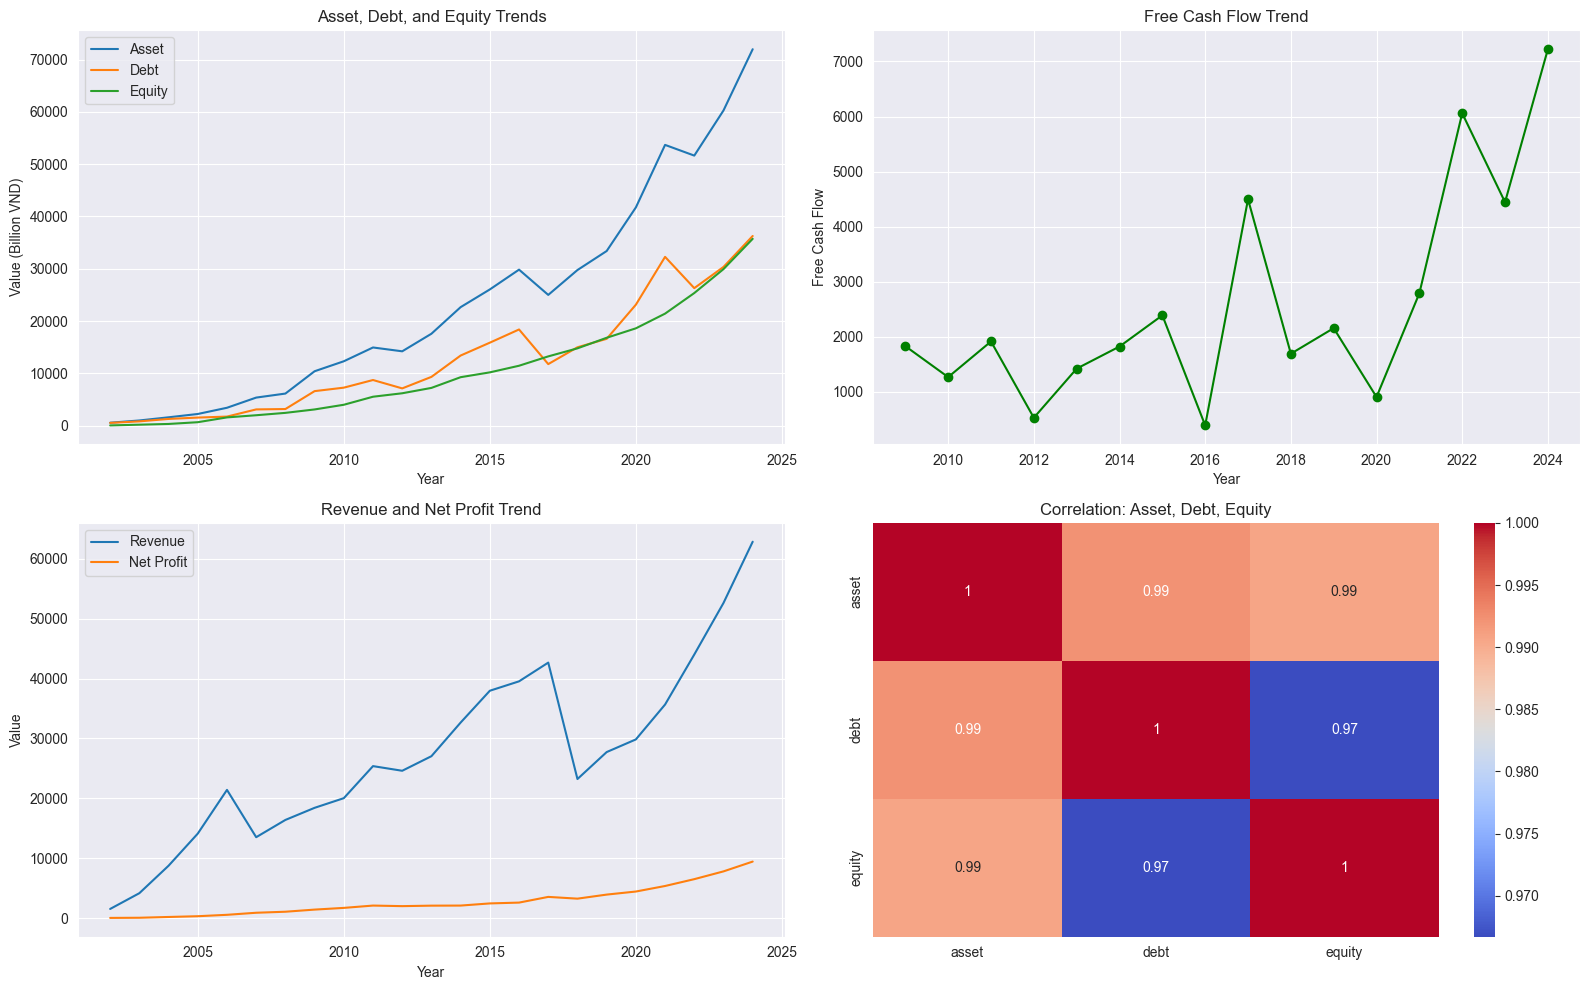

In [24]:
import seaborn as sns

# Visualize the trends and correlations explored above

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Asset, Debt, Equity trends
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Asset')
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['debt'], label='Debt')
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['equity'], label='Equity')
axes[0, 0].set_title('Asset, Debt, and Equity Trends')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Value (Billion VND)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Free Cash Flow trend
axes[0, 1].plot(df_cashflow['year'], df_cashflow['freeCashFlow'], marker='o', color='green')
axes[0, 1].set_title('Free Cash Flow Trend')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Free Cash Flow')
axes[0, 1].grid(True)

# 3. Revenue and Net Profit trend
axes[1, 0].plot(df_incomestatement['year'], df_incomestatement['revenue'], label='Revenue')
axes[1, 0].plot(df_incomestatement['year'], df_incomestatement['postTaxProfit'], label='Net Profit')
axes[1, 0].set_title('Revenue and Net Profit Trend')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Correlation heatmap between Asset, Debt, Equity
corr_matrix = df_balancesheet[['asset', 'debt', 'equity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation: Asset, Debt, Equity')

plt.tight_layout()
plt.show()

The above visualization provides a comprehensive overview of the company's financial health and performance over time:

**Asset, Debt, and Equity Trends:**  
    This plot shows how the company's total assets, debts, and equity have evolved year by year. It helps identify growth patterns, leverage, and capital structure changes.

**Free Cash Flow Trend:**  
    This chart tracks the free cash flow, indicating the company's ability to generate cash after accounting for capital expenditures. Positive and growing free cash flow is a sign of financial strength.

**Revenue and Net Profit Trend:**  
    This subplot compares revenue and net profit over the years, highlighting profitability and operational efficiency. Divergence between the two may indicate changes in costs or margins.

**Correlation Heatmap (Asset, Debt, Equity):**  
    The heatmap visualizes the correlation between assets, debts, and equity. Strong correlations can reveal how these metrics move together, providing insights into the company's financial structure and risk.

Together, these visualizations help in understanding the company's financial trajectory, operational performance, and the relationships between key financial metrics.

- study thêm các chỉ số trong 4 bộ data ảnh hưởng đến nhau như thế nào.
- nếu các chỉ số ảnh hưởng đến doanh thu hay tình hình tài chính chung, xây thử 1 model dự đoán: linear or polynomial regression."

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Merge key columns from all 4 dataframes on 'year'
df_merged = df_balancesheet[['year', 'asset', 'debt', 'equity']].merge(
    df_cashflow[['year', 'freeCashFlow']], on='year', how='inner'
).merge(
    df_incomestatement[['year', 'revenue', 'postTaxProfit']], on='year', how='inner'
).merge(
    df_financialratio[['year', 'roe', 'roa']], on='year', how='inner'
)

# Correlation matrix to study relationships
print("Correlation matrix of merged features:")
print(df_merged.corr())

# Predict 'revenue' using other features (linear regression)
features = ['asset', 'debt', 'equity', 'freeCashFlow', 'postTaxProfit', 'roe', 'roa']
X = df_merged[features]
y = df_merged['revenue']

# Drop rows with NaN in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
print("\nLinear Regression R^2 score:", lr.score(X_test, y_test))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression (deg=2) R^2 score:", lr_poly.score(X_test_poly, y_test_poly))

Correlation matrix of merged features:
                   year     asset      debt    equity  freeCashFlow   revenue  \
year           1.000000  0.956476  0.945101  0.949056      0.668338  0.861121   
asset          0.956476  1.000000  0.991199  0.989904      0.730815  0.886693   
debt           0.945101  0.991199  1.000000  0.962998      0.658039  0.867173   
equity         0.949056  0.989904  0.962998  1.000000      0.781038  0.889786   
freeCashFlow   0.668338  0.730815  0.658039  0.781038      1.000000  0.807188   
revenue        0.861121  0.886693  0.867173  0.889786      0.807188  1.000000   
postTaxProfit  0.921366  0.978561  0.946883  0.990772      0.827391  0.892292   
roe           -0.735584 -0.569227 -0.581000 -0.536898      0.119299 -0.602137   
roa           -0.644992 -0.501687 -0.550910 -0.438137      0.342189 -0.502754   

               postTaxProfit       roe       roa  
year                0.921366 -0.735584 -0.644992  
asset               0.978561 -0.569227 -0.501687

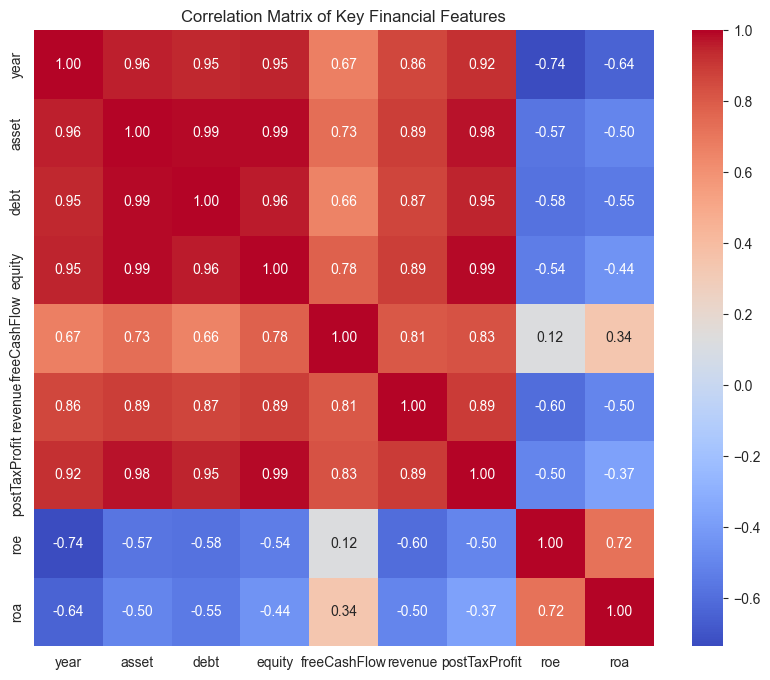

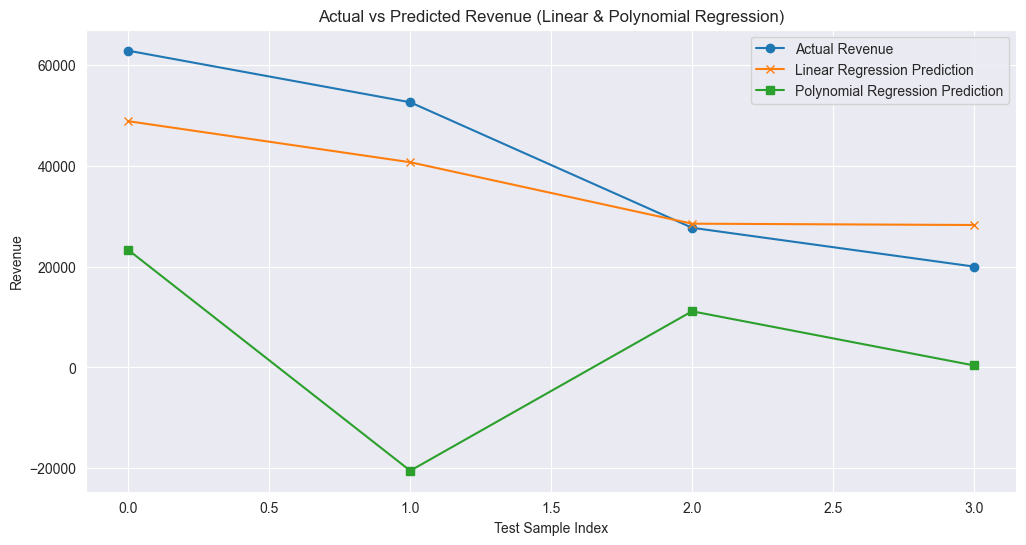

In [26]:
import seaborn as sns

# Visualize correlation matrix of merged features
plt.figure(figsize=(10, 8))
corr = df_merged.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Financial Features")
plt.show()

# Visualize actual vs predicted revenue for Linear and Polynomial Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Revenue', marker='o')
plt.plot(y_pred_linear, label='Linear Regression Prediction', marker='x')
plt.plot(y_pred_poly, label='Polynomial Regression Prediction', marker='s')
plt.xlabel('Test Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue (Linear & Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

## Exploring Relationships Between Financial Indicators

## Correlation Analysis:
Use a correlation matrix to examine the relationships between key indicators from the four datasets (`balancesheet`, `financialratio`, `incomestatement`, `cashflow`). This helps identify which metrics are strongly related, especially those linked to revenue, profit, assets, debt, ROE, ROA, and cash flow.

## Common Findings:
Assets, equity, and debt are often closely correlated.
Free cash flow and post-tax profit can impact revenue growth potential.
Profitability ratios like ROE and ROA usually move in line with revenue and profit.
Other financial ratios such as debt/equity, gross profit margin, and operating profit margin may also help forecast revenue or profit trends.

## Building a Revenue Prediction Model

## Feature Selection:
Select indicators with high correlation to revenue for the prediction model, such as asset, debt, equity, freeCashFlow, postTaxProfit, roe, and roa.

## Model Training:
Experiment with linear regression and polynomial regression (degree 2).
Evaluate model performance using the R² score on the test set.

## Results:
The linear regression model shows how well the input features explain revenue.
The polynomial regression model checks for any nonlinear relationships between variables.

## Conclusion:  
Correlation analysis and predictive modeling help identify the most important financial indicators affecting revenue and overall financial health. This supports financial health assessment and investment decision-making.

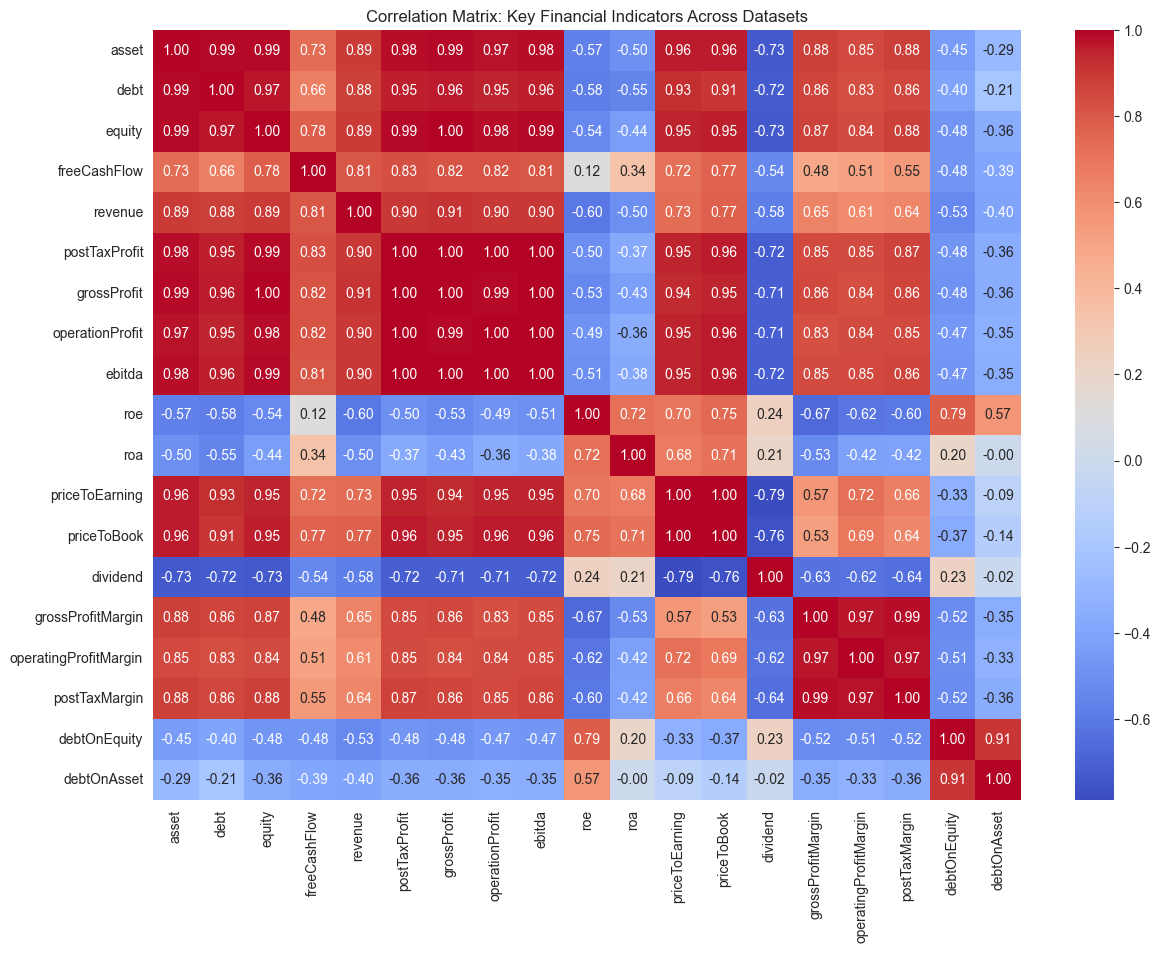

Top features most correlated with revenue:
grossProfit        0.911825
operationProfit    0.899273
ebitda             0.897309
postTaxProfit      0.895706
asset              0.891541
equity             0.888541
debt               0.876935
freeCashFlow       0.807188
priceToBook        0.772887
priceToEarning     0.728219
Name: revenue, dtype: float64

Linear Regression R^2 score (top correlated features): 0.8404342476736785


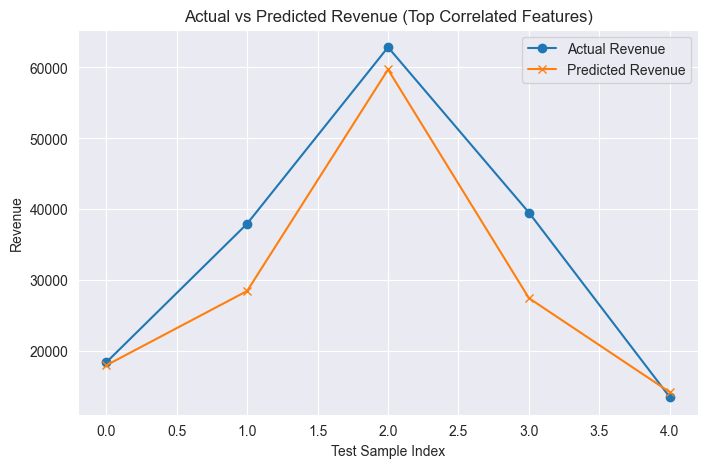

In [27]:
# Correlation Analysis: Examine relationships between key indicators from the four datasets
# (balancesheet, financialratio, incomestatement, cashflow)

# Select relevant numeric columns from each dataframe
financialratio_cols = ['roe', 'roa', 'priceToEarning', 'priceToBook', 'dividend', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset']
incomestatement_cols = ['revenue', 'postTaxProfit', 'grossProfit', 'operationProfit', 'ebitda']
balancesheet_cols = ['asset', 'debt', 'equity']
cashflow_cols = ['freeCashFlow']

# Merge all relevant columns on 'year'
df_corr = df_balancesheet[['year'] + balancesheet_cols].merge(
    df_cashflow[['year'] + cashflow_cols], on='year', how='left'
).merge(
    df_incomestatement[['year'] + incomestatement_cols], on='year', how='left'
).merge(
    df_financialratio_sorted[['year'] + financialratio_cols], on='year', how='left'
)

# Compute correlation matrix
corr_matrix = df_corr.drop(columns=['year']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Key Financial Indicators Across Datasets")
plt.show()

# Identify top features most correlated with revenue
corr_with_revenue = corr_matrix['revenue'].drop('revenue').sort_values(ascending=False)
print("Top features most correlated with revenue:")
print(corr_with_revenue.head(10))

# Optionally, build a simple linear regression model to predict revenue using top correlated features
top_features = corr_with_revenue.head(5).index.tolist()
X = df_corr[top_features]
y = df_corr['revenue']

# Drop rows with missing values
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

if len(X) > 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print("\nLinear Regression R^2 score (top correlated features):", lr.score(X_test, y_test))
    y_pred = lr.predict(X_test)

    # Plot actual vs predicted revenue
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label='Actual Revenue', marker='o')
    plt.plot(y_pred, label='Predicted Revenue', marker='x')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Revenue')
    plt.title('Actual vs Predicted Revenue (Top Correlated Features)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Not enough data for regression modeling.")

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Chọn các chỉ số tài chính có thể ảnh hưởng đến doanh thu
features = ['asset', 'debt', 'equity', 'freeCashFlow', 'postTaxProfit', 'roe', 'roa']
X = df_merged[features]
y = df_merged['revenue']

# Loại bỏ các dòng có giá trị NaN ở X hoặc y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
print("Linear Regression R^2 score:", lr.score(X_test, y_test))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression (deg=2) R^2 score:", lr_poly.score(X_test_poly, y_test_poly))

Linear Regression R^2 score: 0.6696470274820727
Polynomial Regression (deg=2) R^2 score: -5.159576034355845


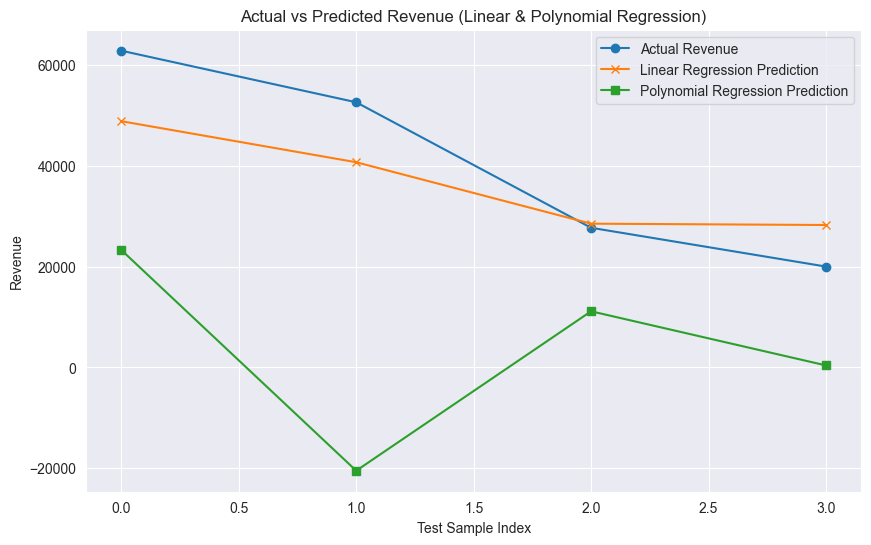

In [29]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted revenue for Linear and Polynomial Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Revenue', marker='o')
plt.plot(y_pred_linear, label='Linear Regression Prediction', marker='x')
plt.plot(y_pred_poly, label='Polynomial Regression Prediction', marker='s')
plt.xlabel('Test Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue (Linear & Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Chọn các chỉ số tài chính có thể ảnh hưởng đến doanh thu
features = ['asset', 'debt', 'equity', 'freeCashFlow', 'postTaxProfit', 'roe', 'roa']
X = df_merged[features]
y = df_merged['revenue']

# Loại bỏ các dòng có giá trị NaN ở X hoặc y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
print("Linear Regression R^2 score:", lr.score(X_test, y_test))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression (deg=2) R^2 score:", lr_poly.score(X_test_poly, y_test_poly))

Linear Regression R^2 score: 0.6696470274820727
Polynomial Regression (deg=2) R^2 score: -5.159576034355845


In [34]:
!pip install tensorflow

In [36]:


# Fetch data from API
# symbol = 'FPT,MBB,VNM'
yearly = True
balancesheet = requests.get(f'http://localhost/api/v1/scfa/balancesheet?yearly={yearly}')
# balancesheet = requests.get(f'http://localhost/api/v1/scfa/balancesheet?symbols={symbol}&yearly={yearly}')
# balancesheet = requests.get(f'http://localhost/api/v1/scfa/balancesheet?yearly={yearly}')
balancesheet_data = balancesheet.json()
balancesheet_data

{'2000': {'BBC': {'cash': 8,
   'asset': 107,
   'debt': 74,
   'equity': 33,
   'payable': 74}},
 '2001': {'TCB': {'cash': 29,
   'asset': 2388,
   'debt': 2273,
   'equity': 116,
   'payable': 2273},
  'BBC': {'cash': 13, 'asset': 163, 'debt': 80, 'equity': 83, 'payable': 80}},
 '2002': {'STB': {'cash': 187,
   'asset': 4296,
   'debt': 3945,
   'equity': 352,
   'payable': 3945},
  'FPT': {'cash': 103,
   'asset': 550,
   'debt': 517,
   'equity': 33,
   'payable': 517},
  'TCB': {'cash': 63,
   'asset': 4060,
   'debt': 3929,
   'equity': 131,
   'payable': 3929},
  'BBC': {'cash': 13, 'asset': 177, 'debt': 101, 'equity': 76, 'payable': 101},
  'VNM': {'cash': 0, 'asset': 0, 'debt': 0, 'equity': 0, 'payable': 0},
  'ACB': {'cash': 206,
   'asset': 9350,
   'debt': 8860,
   'equity': 489,
   'payable': 8860},
  'AGF': {'cash': 2, 'asset': 168, 'debt': 102, 'equity': 66, 'payable': 102},
  'NHC': {'cash': 5, 'asset': 15, 'debt': 1, 'equity': 13, 'payable': 1}},
 '2003': {'MBB': {'cas

# Summary of the Issue

The error occurs because the LSTM model expects input of shape `(None, 3, 5)` (batch_size, sequence_length, features), but it's receiving input of shape `(1,)` during prediction. This happens when `last_sequence` is not properly reshaped before prediction, or when there's insufficient data to create sequences.

The fix involves:
1. Ensuring sufficient data exists before creating sequences
2. Properly handling the prediction input shape
3. Initializing `all_metrics` dictionary before use



Model Performance Metrics:

A32:
  MSE: 0.011823
  RMSE: 0.108734

Predictions for 2025 and 2026:
   year symbol       asset        debt      equity       cash     payable
0  2025    A32  498.300110  266.947876  228.419189  78.618042  267.616760
1  2026    A32  503.307922  273.822083  224.412979  74.505127  273.197235


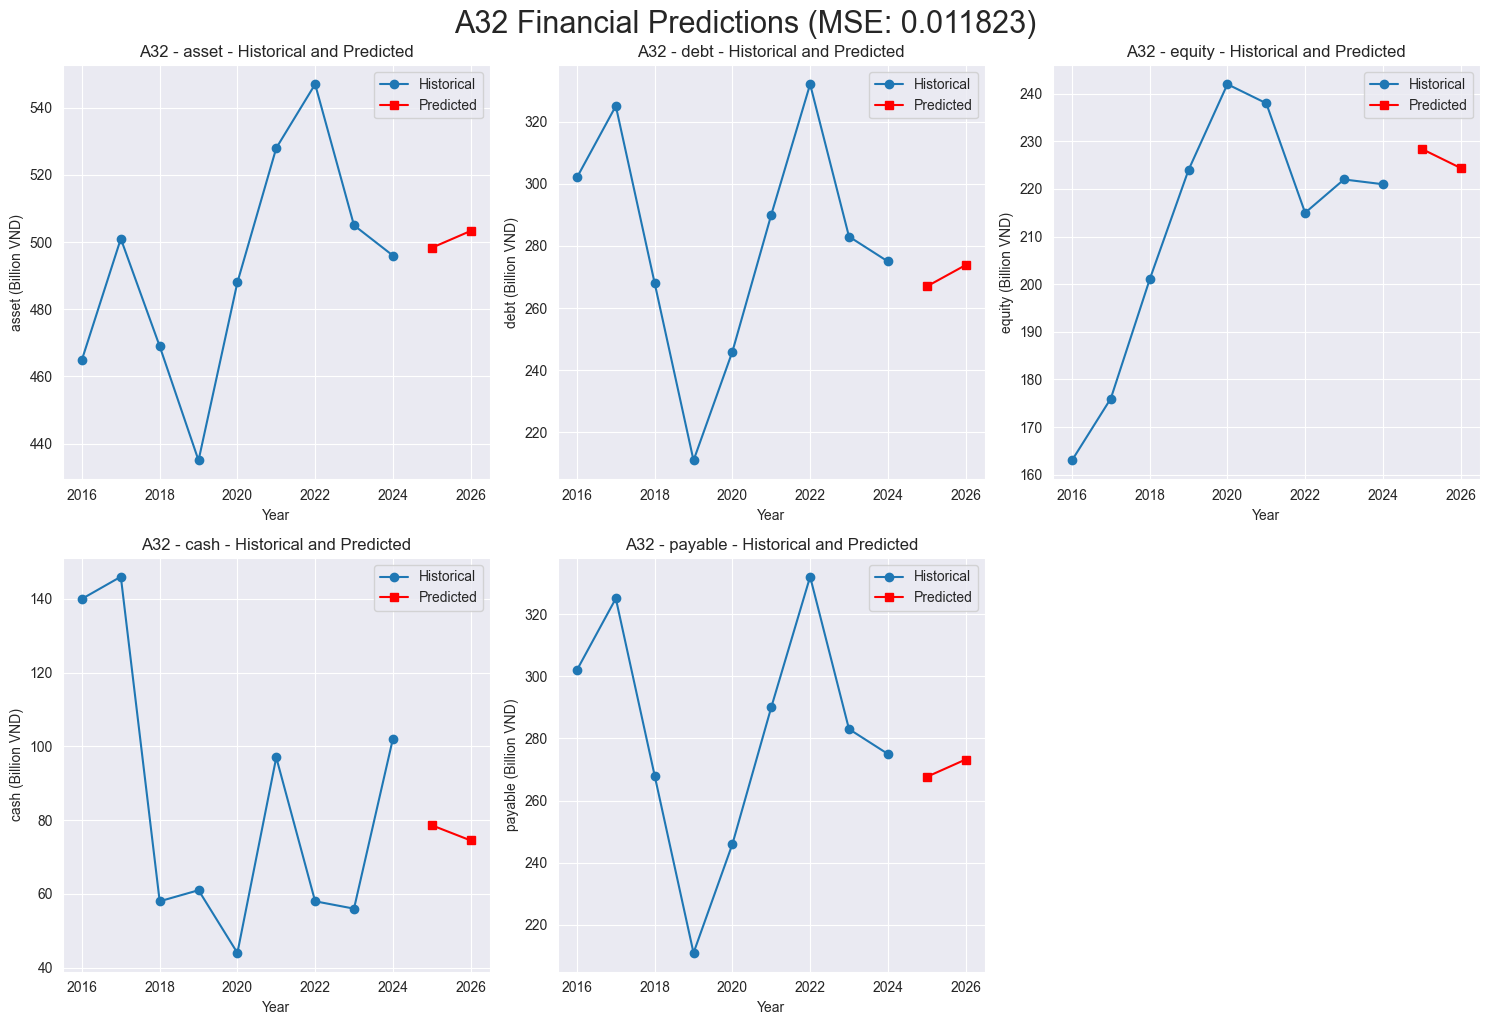

In [37]:
# Transform nested dictionary into a flat structure suitable for LSTM
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert to flat list for each company
rows = []
for year, companies in balancesheet_data.items():
    for symbol, metrics in companies.items():
        row = {'year': int(year), 'symbol': symbol}
        row.update(metrics)
        rows.append(row)

df_balance = pd.DataFrame(rows)

# Drop rows with NaN or null values
df_balance = df_balance.dropna()

df_balance = df_balance.sort_values(['symbol', 'year']).reset_index(drop=True)

# Select features for prediction
feature_cols = ['asset', 'debt', 'equity', 'cash', 'payable']

# Process each company separately
symbols = df_balance['symbol'].unique()
all_predictions = {}
all_metrics = {}

for symbol in symbols:
    df_symbol = df_balance[df_balance['symbol'] == symbol].copy()

    # Skip if not enough data
    if len(df_symbol) < 4:
        print(f"Skipping {symbol}: insufficient data (need at least 4 years)")
        continue

    data = df_symbol[feature_cols].values

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)


    # Create sequences for LSTM
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i + seq_length])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)


    seq_length = 3
    X, y = create_sequences(scaled_data, seq_length)

    # Skip if not enough sequences
    if len(X) == 0:
        print(f"Skipping {symbol}: cannot create sequences")
        continue

    # Build LSTM model
    model = Sequential([
        Input(shape=(seq_length, len(feature_cols))),
        LSTM(50, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(len(feature_cols))
    ])

    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Calculate MSE and MAE on training data
    y_pred_train = model.predict(X, verbose=0)
    mse = mean_squared_error(y, y_pred_train)
    rmse = np.sqrt(mse)

    all_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
    }

    # Predict future years (2025, 2026)
    last_sequence = scaled_data[-seq_length:].copy()
    predictions = []

    for _ in range(2):
        # Ensure proper shape: (1, seq_length, features)
        pred_input = last_sequence.reshape(1, seq_length, len(feature_cols))
        pred = model.predict(pred_input, verbose=0)
        predictions.append(pred[0])
        # Update sequence: remove first row, add prediction
        last_sequence = np.vstack([last_sequence[1:], pred[0]])

    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions))

    # Store predictions
    all_predictions[symbol] = predictions
    break

# Create prediction dataframe
future_years = [2025, 2026]
prediction_rows = []
for symbol, preds in all_predictions.items():
    for i, year in enumerate(future_years):
        row = {'year': year, 'symbol': symbol}
        for j, col in enumerate(feature_cols):
            row[col] = preds[i][j]
        prediction_rows.append(row)

df_predictions = pd.DataFrame(prediction_rows)

print("Model Performance Metrics:")
for symbol, metrics in all_metrics.items():
    print(f"\n{symbol}:")
    print(f"  MSE: {metrics['MSE']:.6f}")
    print(f"  RMSE: {metrics['RMSE']:.6f}")

print("\nPredictions for 2025 and 2026:")
print(df_predictions)

# Visualize predictions for each company
for symbol in symbols:
    if symbol not in all_predictions:
        continue

    df_historical = df_balance[df_balance['symbol'] == symbol]
    df_pred = df_predictions[df_predictions['symbol'] == symbol]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(feature_cols):
        ax = axes[i]
        ax.plot(df_historical['year'], df_historical[col], marker='o', label='Historical')
        ax.plot(df_pred['year'], df_pred[col], marker='s', color='red', label='Predicted')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'{col} (Billion VND)')
        ax.set_title(f'{symbol} - {col} - Historical and Predicted')
        ax.legend()
        ax.grid(True)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

    # Hide unused subplot
    fig.delaxes(axes[5])

    plt.tight_layout()
    plt.suptitle(f'{symbol} Financial Predictions (MSE: {all_metrics[symbol]["MSE"]:.6f})', fontsize=22, y=1.02)
    plt.show()
    break


In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# Fetch data from API
symbol = 'FPT,MBB'
yearly = True
cashflow = requests.get(f'http://localhost/api/v1/scfa/cashflow?symbols={symbol}&yearly={yearly}')
cashflow_data = cashflow.json()
cashflow_data

In [23]:
# Fetch data from API
symbol = 'FPT,MBB'
yearly = True
income_statement = requests.get(f'http://localhost/api/v1/scfa/incomestatement?symbols={symbol}&yearly={yearly}')
income_statement = income_statement.json()
income_statement

{'2002': {'FPT': {'revenue': 1515,
   'preTaxProfit': 18,
   'postTaxProfit': 18,
   'grossProfit': 154,
   'investProfit': 0,
   'operationIncome': 0}},
 '2003': {'FPT': {'revenue': 4148,
   'preTaxProfit': 44,
   'postTaxProfit': 44,
   'grossProfit': 258,
   'investProfit': 0,
   'operationIncome': 0},
  'MBB': {'revenue': 84,
   'preTaxProfit': 73,
   'postTaxProfit': 51,
   'grossProfit': 0,
   'investProfit': 3,
   'operationIncome': 73}},
 '2004': {'FPT': {'revenue': 8735,
   'preTaxProfit': 193,
   'postTaxProfit': 175,
   'grossProfit': 538,
   'investProfit': 0,
   'operationIncome': 0},
  'MBB': {'revenue': 142,
   'preTaxProfit': 104,
   'postTaxProfit': 75,
   'grossProfit': 0,
   'investProfit': 6,
   'operationIncome': 104}},
 '2005': {'FPT': {'revenue': 14101,
   'preTaxProfit': 344,
   'postTaxProfit': 301,
   'grossProfit': 921,
   'investProfit': 0,
   'operationIncome': 0},
  'MBB': {'revenue': 240,
   'preTaxProfit': 149,
   'postTaxProfit': 109,
   'grossProfit': 

In [24]:
# Fetch data from API
symbol = 'FPT,MBB'
yearly = True
financial_ratio = requests.get(f'http://localhost/api/v1/scfa/financialratio?symbols={symbol}&yearly={yearly}')
financial_ratio = financial_ratio.json()
financial_ratio

{'data': [{'ticker': 'FPT',
   'quarter': 5,
   'year': 2024,
   'priceToEarning': 28.5,
   'priceToBook': 7.5,
   'valueBeforeEbitda': 13.4,
   'dividend': 0.015,
   'roe': 0.287,
   'roa': 0.119,
   'daysReceivable': 52,
   'daysInventory': 16,
   'daysPayable': 33,
   'ebitOnInterest': 19.0,
   'earningPerShare': 4612,
   'bookValuePerShare': 17489,
   'interestMargin': None,
   'nonInterestOnToi': None,
   'badDebtPercentage': None,
   'provisionOnBadDebt': None,
   'costOfFinancing': None,
   'equityOnTotalAsset': 0.414,
   'equityOnLoan': None,
   'costToIncome': None,
   'equityOnLiability': 1.0,
   'currentPayment': 1.3,
   'quickPayment': 1.3,
   'epsChange': 0.215,
   'ebitdaOnStock': 9517,
   'grossProfitMargin': 0.377,
   'operatingProfitMargin': 0.167,
   'postTaxMargin': 0.125,
   'debtOnEquity': 0.4,
   'debtOnAsset': 0.2,
   'debtOnEbitda': 1.1,
   'shortOnLongDebt': 28.8,
   'assetOnEquity': 2.4,
   'capitalBalance': 10700,
   'cashOnEquity': 0.261,
   'cashOnCapitaliz

Data Overview:
   year symbol  cash  asset  debt  equity  payable
0  2002    FPT   103    550   517      33      517
1  2003    FPT    80    979   807     172      807
2  2004    FPT   373   1584  1272     312     1272
3  2005    FPT   415   2219  1533     647     1533
4  2006    FPT   669   3409  1720    1566     1720
5  2007    FPT   896   5356  3094    1979     3094
6  2008    FPT  1243   6125  3165    2433     3165
7  2009    FPT  2311  10395  6591    3088     6591
8  2010    FPT  1436  12305  7256    3983     7256
9  2011    FPT  2902  14943  8717    5521     8717

DataFrame shape: (68, 7)

Companies: ['FPT' 'MBB' 'VNM']

Company: FPT
R² Score: 0.9997
MSE: 115407.87
RMSE: 339.72

Coefficients:
  cash: 0.0873
  debt: 0.4974
  equity: 0.9707
  payable: 0.4974
Intercept: 323.69


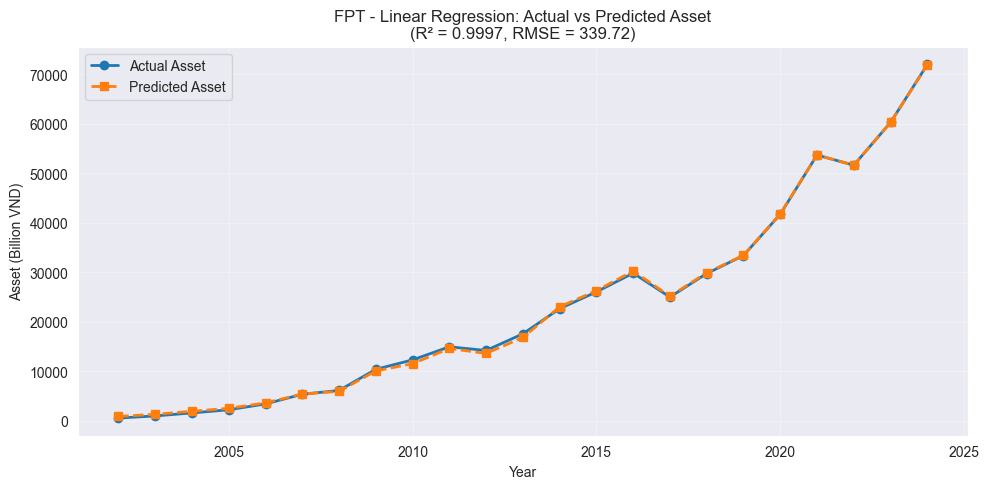


Company: MBB
R² Score: 1.0000
MSE: 0.16
RMSE: 0.40

Coefficients:
  cash: 0.0000
  debt: 0.5000
  equity: 1.0000
  payable: 0.5000
Intercept: -0.12


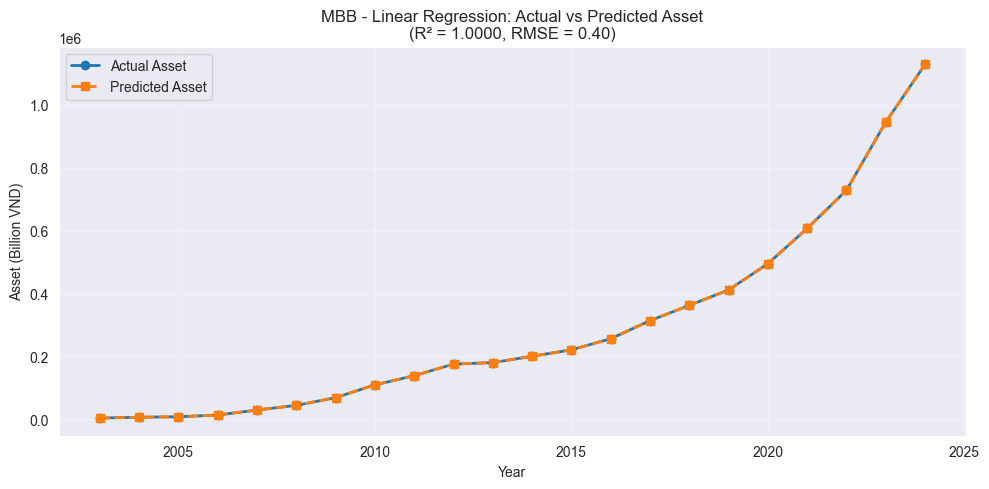


Company: VNM
R² Score: 1.0000
MSE: 627.98
RMSE: 25.06

Coefficients:
  cash: -0.0021
  debt: 0.4968
  equity: 1.0029
  payable: 0.4968
Intercept: 9.97


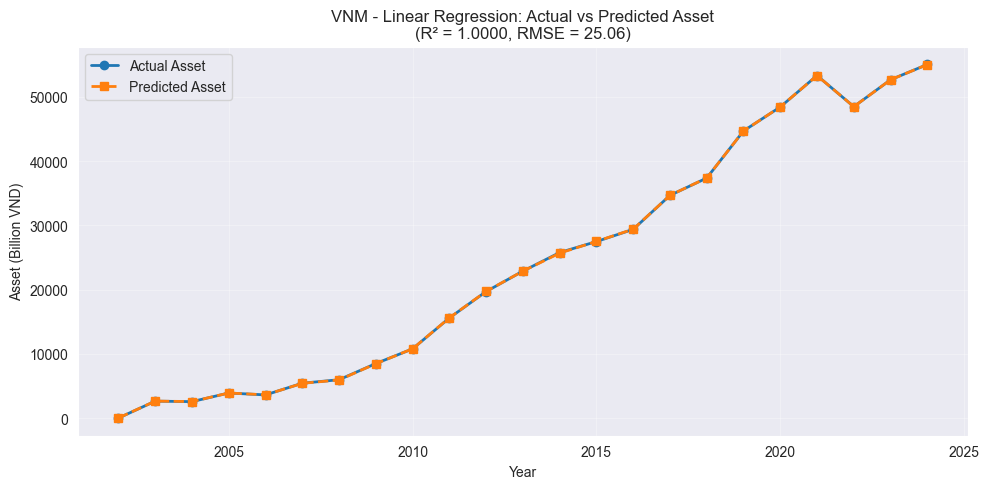

In [61]:
# Transform the provided data dictionary into a DataFrame for linear regression analysis
data_dict = balancesheet_data

# Convert nested dictionary to DataFrame
rows = []
for year, companies in data_dict.items():
    for symbol, metrics in companies.items():
        row = {'year': int(year), 'symbol': symbol}
        row.update(metrics)
        rows.append(row)

df_data = pd.DataFrame(rows)
df_data = df_data.sort_values(['symbol', 'year']).reset_index(drop=True)

print("Data Overview:")
print(df_data.head(10))
print(f"\nDataFrame shape: {df_data.shape}")
print(f"\nCompanies: {df_data['symbol'].unique()}")

# Linear Regression Analysis for each company
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

feature_cols = ['cash', 'debt', 'equity', 'payable']
target_col = 'asset'

for symbol in df_data['symbol'].unique():
    df_symbol = df_data[df_data['symbol'] == symbol].copy()

    # Prepare features and target
    X = df_symbol[feature_cols].values
    y = df_symbol[target_col].values

    # Fit linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)

    # Predictions
    y_pred = lr_model.predict(X)

    # Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{'=' * 50}")
    print(f"Company: {symbol}")
    print(f"{'=' * 50}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"\nCoefficients:")
    for i, col in enumerate(feature_cols):
        print(f"  {col}: {lr_model.coef_[i]:.4f}")
    print(f"Intercept: {lr_model.intercept_:.2f}")

    # Visualize actual vs predicted
    plt.figure(figsize=(10, 5))
    plt.plot(df_symbol['year'], y, marker='o', label='Actual Asset', linewidth=2)
    plt.plot(df_symbol['year'], y_pred, marker='s', label='Predicted Asset', linestyle='--', linewidth=2)
    plt.xlabel('Year')
    plt.ylabel('Asset (Billion VND)')
    plt.title(f'{symbol} - Linear Regression: Actual vs Predicted Asset\n(R² = {r2:.4f}, RMSE = {rmse:.2f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LeakyReLU

In [84]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [85]:
import requests

yearly = True
response = requests.get(f'http://localhost/api/v1/scfa/balancesheet?yearly={yearly}')
balance_sheet = response.json()
balance_sheet

{'2000': {'BBC': {'cash': 8,
   'asset': 107,
   'debt': 74,
   'equity': 33,
   'payable': 74}},
 '2001': {'TCB': {'cash': 29,
   'asset': 2388,
   'debt': 2273,
   'equity': 116,
   'payable': 2273},
  'BBC': {'cash': 13, 'asset': 163, 'debt': 80, 'equity': 83, 'payable': 80}},
 '2002': {'STB': {'cash': 187,
   'asset': 4296,
   'debt': 3945,
   'equity': 352,
   'payable': 3945},
  'FPT': {'cash': 103,
   'asset': 550,
   'debt': 517,
   'equity': 33,
   'payable': 517},
  'TCB': {'cash': 63,
   'asset': 4060,
   'debt': 3929,
   'equity': 131,
   'payable': 3929},
  'BBC': {'cash': 13, 'asset': 177, 'debt': 101, 'equity': 76, 'payable': 101},
  'VNM': {'cash': 0, 'asset': 0, 'debt': 0, 'equity': 0, 'payable': 0},
  'ACB': {'cash': 206,
   'asset': 9350,
   'debt': 8860,
   'equity': 489,
   'payable': 8860},
  'AGF': {'cash': 2, 'asset': 168, 'debt': 102, 'equity': 66, 'payable': 102},
  'NHC': {'cash': 5, 'asset': 15, 'debt': 1, 'equity': 13, 'payable': 1}},
 '2003': {'MBB': {'cas

In [86]:
# Convert balance_sheet dictionary to pandas DataFrame
rows = []
for year, companies in balance_sheet.items():
    for symbol, metrics in companies.items():
        row = {'year': int(year), 'symbol': symbol}
        row.update(metrics)
        rows.append(row)

df_balance_sheet = pd.DataFrame(rows)
df_balance_sheet = df_balance_sheet.sort_values(['symbol', 'year']).reset_index(drop=True)
df_balance_sheet = df_balance_sheet.fillna(value=0)

# Select features for prediction
# feature_cols = ['asset', 'debt', 'equity', 'cash', 'payable']
feature_cols = ['asset']

# Process each company separately
symbols = df_balance_sheet['symbol'].unique()

In [87]:
# Create sequences for multivariate LSTM
def create_multivariate_dataset(dataset, look_back=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        data_x.append(a)
        data_y.append(dataset[i + look_back, :])
    return np.array(data_x), np.array(data_y)

In [88]:
def prepare_lstm_model(shape: tuple, dropout: float = 0.2, dense_units: int = 10):
    layers = [
        Input(shape=shape),
        LSTM(50, activation='relu', return_sequences=True),
        Dropout(dropout),
        LSTM(50, activation='relu'),
        Dropout(dropout),
        Dense(dense_units),
    ]
    lstm_model = Sequential(layers)
    lstm_model.compile(loss='mean_squared_error', optimizer='adam')
    return lstm_model


def prepare_lstm_model_leaky_relu(shape: tuple, dropout: float = 0.2, dense_units: int = 10):
    layers = [
        Input(shape=shape),
        LSTM(50, activation='relu', return_sequences=True),
        LeakyReLU(),
        Dropout(dropout),
        LSTM(50, activation='relu'),
        LeakyReLU(),
        Dropout(dropout),
        Dense(dense_units),
    ]
    lstm_model = Sequential(layers)
    lstm_model.compile(loss='mean_squared_error', optimizer='adam')
    return lstm_model

The error occurs because there's a mismatch between the model architecture and the data being fed to it. The model is defined with conflicting input specifications:

1. `Input(shape=(seq_length, len(feature_cols)))` expects shape `(3, 5)` - meaning 3 time steps with 5 features
2. But then `LSTM(50, input_shape=(1, look_back), ...)` expects shape `(1, 1)` - meaning 1 time step with 1 feature
3. The actual data being fed is univariate (single feature) with `look_back=1`

The solution is to make the model architecture consistent with the univariate time series approach:



In [1]:
look_back = 1
seq_length = 3

# Determine epochs and batch_size based on data size
# Create LSTM model for multivariate prediction
model = prepare_lstm_model(shape=(look_back, len(feature_cols)), dense_units=len(feature_cols))

# create and fit the LSTM network
for symbol in symbols:
    if symbol != "VNM":
        continue
    df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol].copy()

    # Skip if not enough data
    if len(df_symbol) < 4:
        print(f"Skipping {symbol}: insufficient data (need at least 4 years)")
        continue

    # Adjust epochs and batch_size based on actual symbol data size
    symbol_data_size = len(df_symbol)
    epochs = min(100, max(50, symbol_data_size * 10))
    batch_size = max(1, min(32, symbol_data_size // 4))

    print(f"Training {symbol} with {symbol_data_size} data points: epochs={epochs}, batch_size={batch_size}")

    # Use all feature columns for multivariate prediction
    data = df_symbol[feature_cols].values

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split into train and test sets based on year
    # Train: year <= 2022, Test: year > 2022 (2023-2024)
    train_mask = df_symbol['year'] <= 2022
    test_mask = df_symbol['year'] > 2022

    train_data = scaled_data[train_mask.values]
    test_data = scaled_data[test_mask.values]

    # Skip if not enough data in either set
    if len(train_data) < look_back + 1 or len(test_data) < 1:
        print(f"Skipping {symbol}: insufficient train or test data")
        continue

    # reshape into X=t and Y=t+1
    trainX, trainY = create_multivariate_dataset(train_data, look_back)
    testX, testY = create_multivariate_dataset(test_data, look_back)

    # Skip if not enough sequences
    if len(trainX) == 0:
        print(len(trainX))
        print(len(testX))
        print(f"Skipping {symbol}: cannot create sequences")
        continue

    # Fit with verbose=0 to avoid the progress bar error
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)
    print(f"Model trained for {symbol}")

    # make predictions
    # trainPredict = model.predict(trainX)
    # testPredict = model.predict(testX)
    # # invert predictions
    # trainPredict = scaler.inverse_transform(trainPredict)
    # trainY_inv = scaler.inverse_transform(trainY)
    # testPredict = scaler.inverse_transform(testPredict)
    # testY_inv = scaler.inverse_transform(testY)
    #
    # # calculate root mean squared error
    # print(f"Train Mean Squared Error: {mean_squared_error(trainY_inv, trainPredict)}")
    # print(f"Test Mean Squared Error: {mean_squared_error(testY_inv, testPredict)}")
    # trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
    # print(f'Train Score: {trainScore:.2f} RMSE')
    # testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
    # print(f'Test Score: {testScore:.2f} RMSE')

# Save the entire model in the recommended .keras format
model.save('balancesheet_all_symbols_lstm_model.keras')


NameError: name 'prepare_lstm_model' is not defined

I'll analyze the user's request and modify the selected cell to predict financial metrics to 2026.

**User Request Summary:** The user wants to extend the LSTM model predictions to forecast financial statement metrics (asset, debt, equity, cash, payable) for the year 2026.

**Modified Cell Code:**



In [67]:
# Train with Leaky Relu
look_back = 1
seq_length = 3

# Determine epochs and batch_size based on data size
# Create LSTM model for multivariate prediction
model = prepare_lstm_model_leaky_relu(shape=(look_back, len(feature_cols)), dense_units=len(feature_cols))


# create and fit the LSTM network
for symbol in symbols:
    df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol].copy()

    # Skip if not enough data
    if len(df_symbol) < 4:
        print(f"Skipping {symbol}: insufficient data (need at least 4 years)")
        continue

    # Adjust epochs and batch_size based on actual symbol data size
    symbol_data_size = len(df_symbol)
    epochs = min(100, max(50, symbol_data_size * 10))
    batch_size = max(1, min(32, symbol_data_size // 4))

    print(f"Training {symbol} with {symbol_data_size} data points: epochs={epochs}, batch_size={batch_size}")

    # Use all feature columns for multivariate prediction
    data = df_symbol[feature_cols].values

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # split into train and test sets
    train_size = int(len(scaled_data) * 0.67)
    test_size = len(scaled_data) - train_size
    train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

    # reshape into X=t and Y=t+1
    trainX, trainY = create_multivariate_dataset(scaled_data, look_back)
    testX, testY = create_multivariate_dataset(test, look_back)

    # Skip if not enough sequences
    if len(trainX) == 0 or len(testX) == 0:
        print(f"Skipping {symbol}: cannot create sequences")
        continue

    # Fit with verbose=0 to avoid the progress bar error
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)
    print(f"Model trained for {symbol}")

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY_inv = scaler.inverse_transform(trainY)
    testPredict = scaler.inverse_transform(testPredict)
    testY_inv = scaler.inverse_transform(testY)

    # calculate root mean squared error
    print(f"Train Mean Squared Error: {mean_squared_error(trainY_inv, trainPredict)}")
    print(f"Test Mean Squared Error: {mean_squared_error(testY_inv, testPredict)}")
    trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
    print(f'Train Score: {trainScore:.2f} RMSE')
    testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
    print(f'Test Score: {testScore:.2f} RMSE')

# Save the entire model in the recommended .keras format
model.save('balancesheet_all_symbols_lstm_model.keras')


Training A32 with 9 data points: epochs=90, batch_size=2
Model trained for A32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Train Mean Squared Error: 961.3857639495816
Test Mean Squared Error: 148.64675709977746
Train Score: 31.01 RMSE
Test Score: 12.19 RMSE
Training AAA with 18 data points: epochs=100, batch_size=4
Model trained for AAA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Train Mean Squared Error: 1130972.6986794574
Test Mean Squared Error: 424645.0745973587
Train Score: 1063.47 RMSE
Test Score: 651.65 RMSE
Training AAH with 5 data points: epochs=50, batch_size=1
Skipping AAH: cannot create sequences
Training AAM with 20 data points: epochs=100, batch_size=5
Model trained for AAM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Train Mean Squared Error: 2365.6858944761334
Test Mean Squared Error: 333.9095041793772
Train Score: 48.64 RMSE
Test Score: 18.27 RMSE
Training AAS with 11 data 

KeyboardInterrupt: 

In [125]:
# Load the saved model and make predictions
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('balancesheet_all_symbols_lstm_model.keras')

# Visualize training results and make predictions to 2026
# Use all feature columns for multivariate prediction
symbol_prediction = "VNM"
df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol_prediction].copy()
data = df_symbol[feature_cols].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Make predictions for 2025 and 2026
last_sequence = scaled_data[-look_back:].copy()
future_predictions = []

# future_years = [2025, 2026, 2027, 2028, 2029, 2030]
future_years = [2025, 2026]

# make predictions
train_data = df_symbol[df_symbol['year'] <= 2022][feature_cols].values
test_data = df_symbol[df_symbol['year'] > 2022][feature_cols].values

# train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]
trainX, trainY = create_multivariate_dataset(train_data, look_back)
testX, testY = create_multivariate_dataset(test_data, look_back)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY_inv = scaler.inverse_transform(trainY)
# testPredict = scaler.inverse_transform(testPredict)
# testY_inv = scaler.inverse_transform(testY)
#
# for _ in range(len(future_years)):
#     pred_input = last_sequence.reshape(1, look_back, len(feature_cols))
#     pred = model.predict(pred_input, verbose=0)
#     future_predictions.append(pred[0])
#     last_sequence = np.vstack([last_sequence[1:], pred[0]])
#
# # Inverse transform predictions
# future_predictions = scaler.inverse_transform(np.array(future_predictions))
#
# # Prepare data for plotting
# actual_data = scaler.inverse_transform(scaled_data)
#
# # calculate root mean squared error
# print(f"Train Mean Squared Error: {mean_squared_error(trainY_inv, trainPredict)}")
# print(f"Test Mean Squared Error: {mean_squared_error(testY_inv, testPredict)}")
# trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
# print(f'Train Score: {trainScore:.2f} RMSE')
# testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
# print(f'Test Score: {testScore:.2f} RMSE')
#
# # Plot actual vs predicted with future predictions
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# axes = axes.flatten()
#
# for i, col in enumerate(feature_cols):
#     ax = axes[i]
#
#     # Plot historical data
#     ax.plot(df_symbol['year'], actual_data[:, i],
#             marker='o', label='Historical', linewidth=2, color='blue')
#
#     # Plot train predictions
#     trainPredictPlot = np.full(len(scaled_data), np.nan)
#     trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict[:, i]
#     ax.plot(df_symbol['year'], trainPredictPlot,
#             label='Train Predictions', linestyle='--', linewidth=2, color='green')
#
#     # Plot test predictions
#     testPredictPlot = np.full(len(scaled_data), np.nan)
#     testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(scaled_data) - 1] = testPredict[:, i]
#     ax.plot(df_symbol['year'], testPredictPlot,
#             label='Test Predictions', linestyle='--', linewidth=2, color='orange')
#
#     # Plot future predictions (2025-2026)
#     ax.plot(future_years, future_predictions[:, i],
#             marker='s', label='Future Predictions (2025-2026)',
#             linewidth=2, color='red', markersize=8)
#
#     ax.set_title(f'{col.capitalize()} - Actual vs Predicted')
#     ax.set_xlabel('Year')
#     ax.set_ylabel(f'{col.capitalize()} (Billion VND)')
#     ax.legend()
#     ax.grid(True, alpha=0.3)
#     ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
#
# # Hide unused subplot
# fig.delaxes(axes[5])
#
# plt.suptitle(
#     f'{symbol_prediction} - LSTM Model: Historical vs Predictions (Train RMSE: {trainScore:.2f}, Test RMSE: {testScore:.2f})',
#     fontsize=16, y=1.00)
# plt.tight_layout()
# plt.show()
#
# # Display prediction results
# print(f"\n{'=' * 60}")
# print(f"Predictions for {symbol_prediction}")
# print(f"{'=' * 60}")
# for year_idx, year in enumerate(future_years):
#     print(f"\nYear {year}:")
#     for col_idx, col in enumerate(feature_cols):
#         print(f"  {col.capitalize()}: {future_predictions[year_idx, col_idx]:,.2f} Billion VND")
#
# # Plot prediction errors
# plt.figure(figsize=(14, 5))
#
# plt.subplot(1, 2, 1)
# train_errors = trainY_inv[:, 0] - trainPredict[:, 0]
# plt.hist(train_errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# plt.axvline(train_errors.mean(), color='red', linestyle='--', linewidth=2,
#             label=f'Mean: {train_errors.mean():.2f}')
# plt.title('Training Prediction Errors Distribution')
# plt.xlabel('Prediction Error')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# plt.subplot(1, 2, 2)
# test_errors = testY_inv[:, 0] - testPredict[:, 0]
# plt.hist(test_errors, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
# plt.axvline(test_errors.mean(), color='red', linestyle='--', linewidth=2,
#             label=f'Mean: {test_errors.mean():.2f}')
# plt.title('Test Prediction Errors Distribution')
# plt.xlabel('Prediction Error')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# plt.tight_layout()
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


/Users/tuyenhuynh/Documents/Study/FinalProject/FinancialAssistant/notebook/.venv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for RNN
symbol_prediction = "FPT"
df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol_prediction].copy()
data = df_symbol[feature_cols].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
look_back = 3
trainX, trainY = create_multivariate_dataset(scaled_data, look_back)

# Build RNN model
rnn_model = Sequential([
    Input(shape=(look_back, len(feature_cols))),
    SimpleRNN(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(len(feature_cols))
])

rnn_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 100
batch_size = max(1, len(trainX) // 4)
history = rnn_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

print(f"RNN Model trained for {symbol_prediction}")

# Make predictions
trainPredict = rnn_model.predict(trainX)
trainPredict_inv = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
print(f'Train RMSE: {train_rmse:.2f}')

# Predict future years (2025, 2026)
last_sequence = scaled_data[-look_back:].copy()
future_predictions = []
future_years = [2025, 2026]

for _ in range(len(future_years)):
    pred_input = last_sequence.reshape(1, look_back, len(feature_cols))
    pred = rnn_model.predict(pred_input, verbose=0)
    future_predictions.append(pred[0])
    last_sequence = np.vstack([last_sequence[1:], pred[0]])

future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Visualize results
actual_data = scaler.inverse_transform(scaled_data)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    ax = axes[i]

    # Historical data
    ax.plot(df_symbol['year'], actual_data[:, i],
            marker='o', label='Historical', linewidth=2, color='blue')

    # Train predictions
    trainPredictPlot = np.full(len(scaled_data), np.nan)
    trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict_inv[:, i]
    ax.plot(df_symbol['year'], trainPredictPlot,
            label='RNN Predictions', linestyle='--', linewidth=2, color='green')

    # Future predictions
    ax.plot(future_years, future_predictions[:, i],
            marker='s', label='Future (2025-2026)',
            linewidth=2, color='red', markersize=8)

    ax.set_title(f'{col.capitalize()} - RNN Model')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{col.capitalize()} (Billion VND)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

fig.delaxes(axes[5])
plt.suptitle(f'{symbol_prediction} - RNN Model Predictions (RMSE: {train_rmse:.2f})',
             fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# Display predictions
print(f"\n{'=' * 60}")
print(f"RNN Predictions for {symbol_prediction}")
print(f"{'=' * 60}")
for year_idx, year in enumerate(future_years):
    print(f"\nYear {year}:")
    for col_idx, col in enumerate(feature_cols):
        print(f"  {col.capitalize()}: {future_predictions[year_idx, col_idx]:,.2f} Billion VND")

# Save the RNN model
rnn_model.save('balancesheet_rnn_model.keras')
print("\nRNN model saved as 'balancesheet_rnn_model.keras'")


NameError: name 'df_balance_sheet' is not defined

GRU Model trained for FPT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Train RMSE: 2577.01


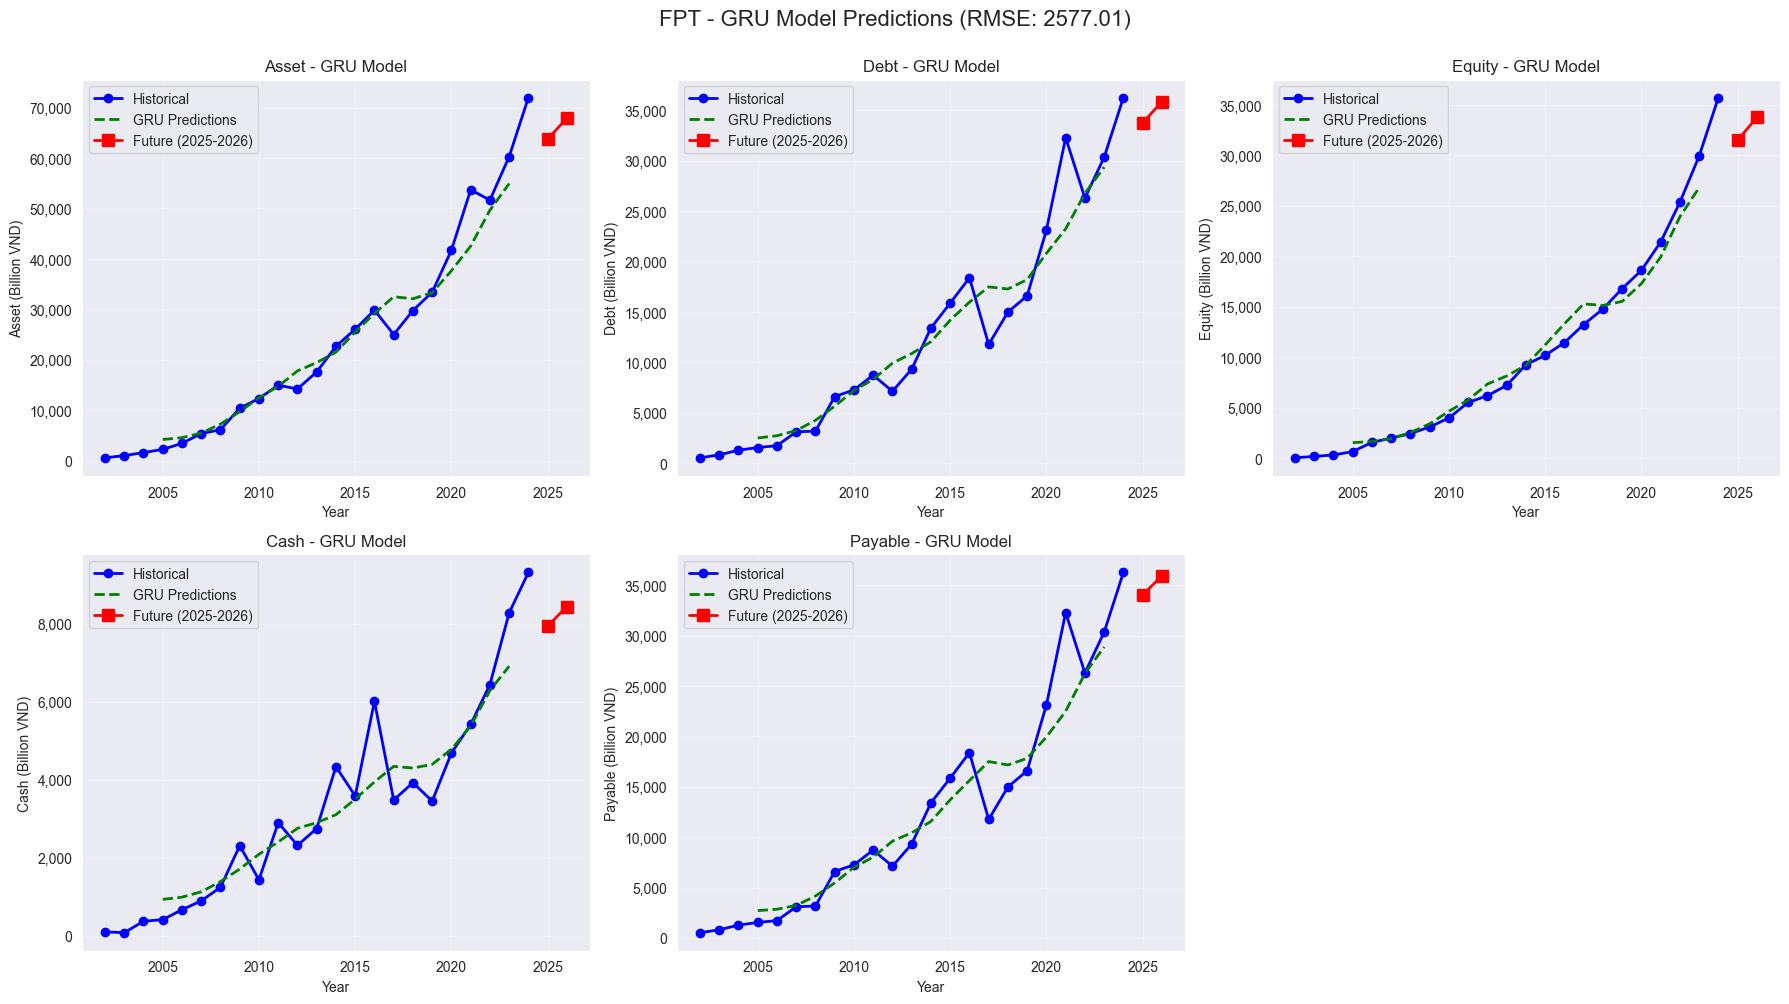


GRU Predictions for FPT

Year 2025:
  Asset: 63,774.18 Billion VND
  Debt: 33,752.15 Billion VND
  Equity: 31,514.23 Billion VND
  Cash: 7,940.03 Billion VND
  Payable: 34,040.45 Billion VND

Year 2026:
  Asset: 67,901.90 Billion VND
  Debt: 35,863.39 Billion VND
  Equity: 33,749.04 Billion VND
  Cash: 8,439.61 Billion VND
  Payable: 35,938.70 Billion VND

GRU model saved as 'balancesheet_gru_model.keras'


In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for GRU
symbol_prediction = "FPT"
df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol_prediction].copy()
data = df_symbol[feature_cols].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
look_back = 3
trainX, trainY = create_multivariate_dataset(scaled_data, look_back)

# Build GRU model
gru_model = Sequential([
    Input(shape=(look_back, len(feature_cols))),
    GRU(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    GRU(50, activation='relu'),
    Dropout(0.2),
    Dense(len(feature_cols))
])

gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 100
batch_size = max(1, len(trainX) // 4)
history = gru_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

print(f"GRU Model trained for {symbol_prediction}")

# Make predictions
trainPredict = gru_model.predict(trainX)
trainPredict_inv = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
print(f'Train RMSE: {train_rmse:.2f}')

# Predict future years (2025, 2026)
last_sequence = scaled_data[-look_back:].copy()
future_predictions = []
future_years = [2025, 2026]

for _ in range(len(future_years)):
    pred_input = last_sequence.reshape(1, look_back, len(feature_cols))
    pred = gru_model.predict(pred_input, verbose=0)
    future_predictions.append(pred[0])
    last_sequence = np.vstack([last_sequence[1:], pred[0]])

future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Visualize results
actual_data = scaler.inverse_transform(scaled_data)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    ax = axes[i]

    # Historical data
    ax.plot(df_symbol['year'], actual_data[:, i],
            marker='o', label='Historical', linewidth=2, color='blue')

    # Train predictions
    trainPredictPlot = np.full(len(scaled_data), np.nan)
    trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict_inv[:, i]
    ax.plot(df_symbol['year'], trainPredictPlot,
            label='GRU Predictions', linestyle='--', linewidth=2, color='green')

    # Future predictions
    ax.plot(future_years, future_predictions[:, i],
            marker='s', label='Future (2025-2026)',
            linewidth=2, color='red', markersize=8)

    ax.set_title(f'{col.capitalize()} - GRU Model')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{col.capitalize()} (Billion VND)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

fig.delaxes(axes[5])
plt.suptitle(f'{symbol_prediction} - GRU Model Predictions (RMSE: {train_rmse:.2f})',
             fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# Display predictions
print(f"\n{'=' * 60}")
print(f"GRU Predictions for {symbol_prediction}")
print(f"{'=' * 60}")
for year_idx, year in enumerate(future_years):
    print(f"\nYear {year}:")
    for col_idx, col in enumerate(feature_cols):
        print(f"  {col.capitalize()}: {future_predictions[year_idx, col_idx]:,.2f} Billion VND")

# Save the GRU model
gru_model.save('balancesheet_gru_model.keras')
print("\nGRU model saved as 'balancesheet_gru_model.keras'")


LSTM Model trained for VNM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Train RMSE: 1573.27


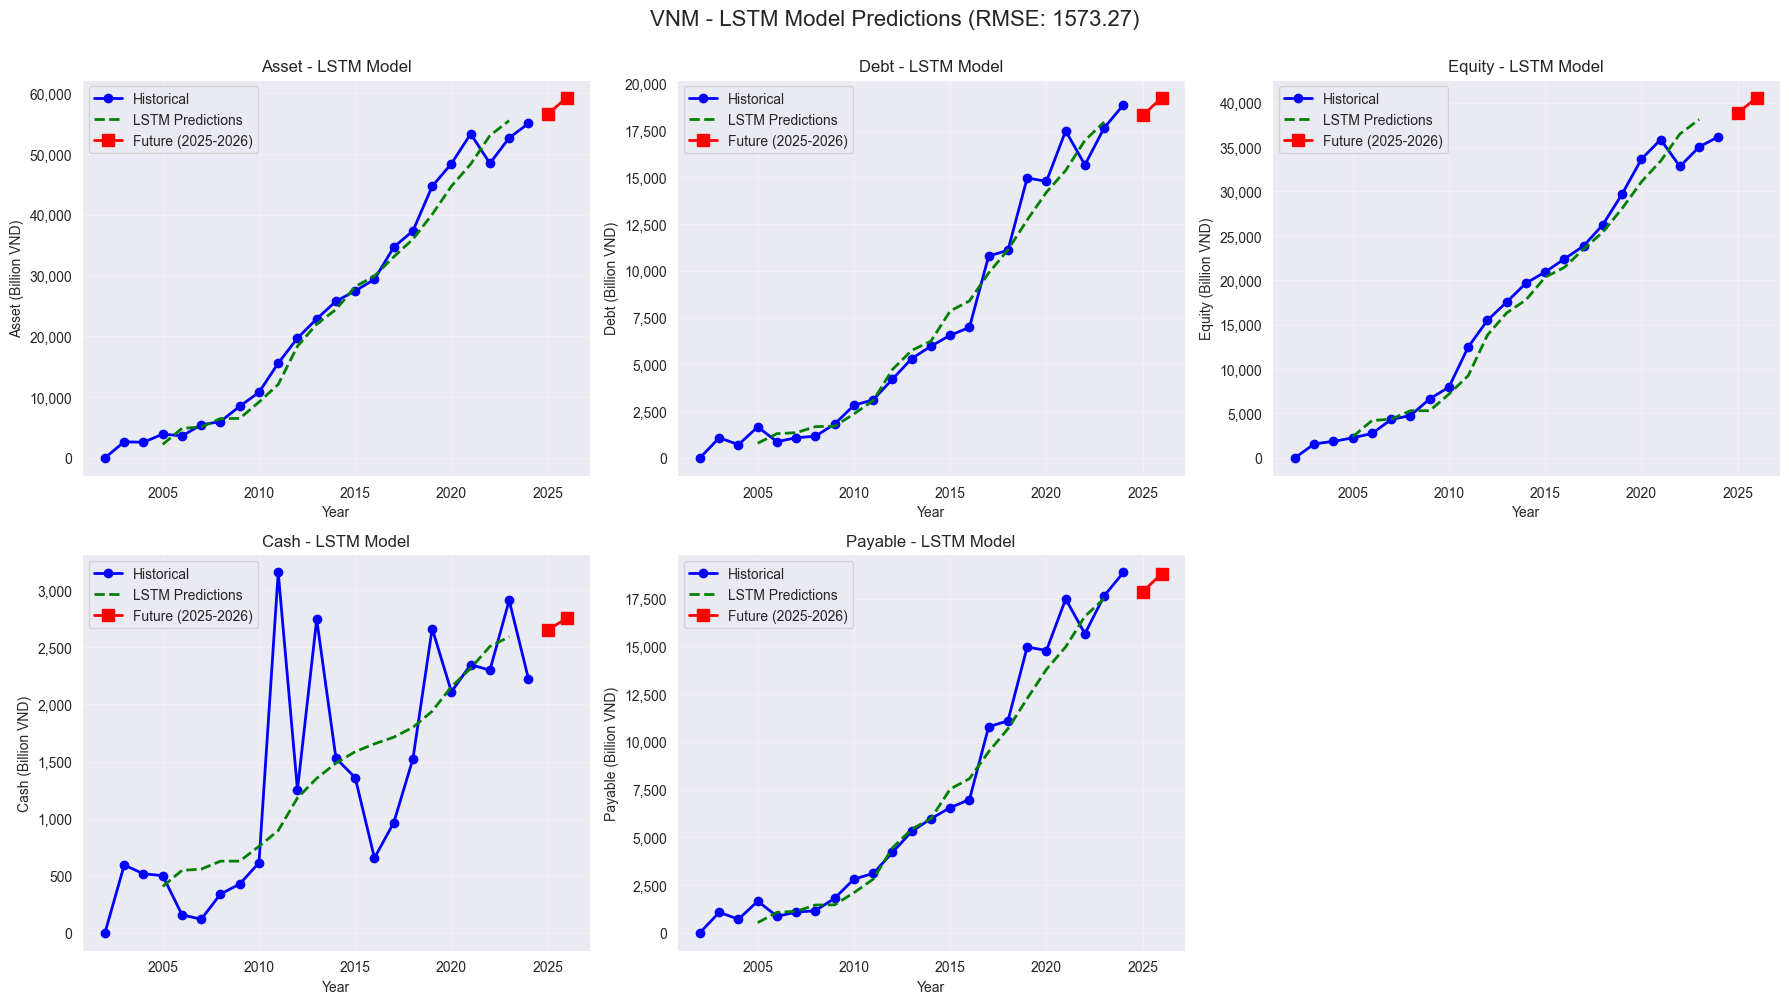


LSTM Predictions for VNM

Year 2025:
  Asset: 56,573.58 Billion VND
  Debt: 18,308.80 Billion VND
  Equity: 38,830.28 Billion VND
  Cash: 2,652.29 Billion VND
  Payable: 17,865.94 Billion VND

Year 2026:
  Asset: 59,319.16 Billion VND
  Debt: 19,269.21 Billion VND
  Equity: 40,587.45 Billion VND
  Cash: 2,756.26 Billion VND
  Payable: 18,817.35 Billion VND

LSTM model saved as 'balancesheet_lstm_model.keras'


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Prepare data for LSTM
symbol_prediction = "VNM"
df_symbol = df_balance_sheet[df_balance_sheet['symbol'] == symbol_prediction].copy()
data = df_symbol[feature_cols].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
look_back = 3
trainX, trainY = create_multivariate_dataset(scaled_data, look_back)

# Build LSTM model
model = Sequential([
    Input(shape=(look_back, len(feature_cols))),
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(len(feature_cols))
])

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
epochs = 100
batch_size = max(1, len(trainX) // 4)
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

print(f"LSTM Model trained for {symbol_prediction}")

# Make predictions
trainPredict = model.predict(trainX)
trainPredict_inv = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
print(f'Train RMSE: {train_rmse:.2f}')

# Predict future years (2025, 2026)
last_sequence = scaled_data[-look_back:].copy()
future_predictions = []
future_years = [2025, 2026]

for _ in range(len(future_years)):
    pred_input = last_sequence.reshape(1, look_back, len(feature_cols))
    pred = model.predict(pred_input, verbose=0)
    future_predictions.append(pred[0])
    last_sequence = np.vstack([last_sequence[1:], pred[0]])

future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Visualize results
actual_data = scaler.inverse_transform(scaled_data)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    ax = axes[i]

    # Historical data
    ax.plot(df_symbol['year'], actual_data[:, i],
            marker='o', label='Historical', linewidth=2, color='blue')

    # Train predictions
    trainPredictPlot = np.full(len(scaled_data), np.nan)
    trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict_inv[:, i]
    ax.plot(df_symbol['year'], trainPredictPlot,
            label='LSTM Predictions', linestyle='--', linewidth=2, color='green')

    # Future predictions
    ax.plot(future_years, future_predictions[:, i],
            marker='s', label='Future (2025-2026)',
            linewidth=2, color='red', markersize=8)

    ax.set_title(f'{col.capitalize()} - LSTM Model')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{col.capitalize()} (Billion VND)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

fig.delaxes(axes[5])
plt.suptitle(f'{symbol_prediction} - LSTM Model Predictions (RMSE: {train_rmse:.2f})',
             fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# Display predictions
print(f"\n{'=' * 60}")
print(f"LSTM Predictions for {symbol_prediction}")
print(f"{'=' * 60}")
for year_idx, year in enumerate(future_years):
    print(f"\nYear {year}:")
    for col_idx, col in enumerate(feature_cols):
        print(f"  {col.capitalize()}: {future_predictions[year_idx, col_idx]:,.2f} Billion VND")

# Save the LSTM model
model.save('balancesheet_lstm_model.keras')
print("\nLSTM model saved as 'balancesheet_lstm_model.keras'")
